In [1]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:

# importing necessary libraries
import pandas as pd
import numpy as np

# Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
from scipy import stats

sns.set_style('darkgrid')

import markdown

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


# from Scipy statistics distribution
from scipy.stats import poisson
from scipy.stats import norm
import statistics

from numpy import exp
from scipy.stats import boxcox

In [3]:
# train test
from sklearn.model_selection import train_test_split


# stratified k-fold cross validation evaluation regression models
from numpy import loadtxt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras import optimizers
from keras import losses
from keras import metrics


#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#import libraries for regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error



# statsmodels is a Python modules statistical models

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms




2022-12-28 19:58:27.246828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Process of acquiring data (research)

# EU Agricultural Price Indices (API)
# How to see Ireland with respect to its EU community partners?

Function to read file excel downloaded from 

 https://ec.europa.eu/eurostat/web/agriculture/data/database
 
 https://ec.europa.eu/eurostat/cache/metadata/en/apri_pi_esms.htm
 
 
The EU Agricultural Price Indices (API) comprise:

1- the index of purchase prices of the means of agricultural production (input)

Index of variation of the expenditure incurred by farmers in purchasing the means of production (goods and services as well as investment goods), including crop products from other agricultural units for intermediate consumption, over a given period.


2- the index of producer prices of agricultural products (output)

Index of variation of prices reflecting revenue received by the producer for goods and services actually sold to customers over a period.



 
## Index of prices (input) by period

Price indices of the means of agricultural production, input (2015 = 100) - annual data

Price indices of the means of agricultural production, input (2010 = 100) - annual data

Price indices of the means of agricultural production, input (2005 = 100) - annual data

Price indices of the means of agricultural production, input (2000 = 100) - annual data



## Index of expenditure (output) by period

Price indices of agricultural products, output (2015 = 100) - annual data

Price indices of agricultural products, output (2010 = 100) - annual data

Price indices of agricultural products, output (2005 = 100) - annual data

Price indices of agricultural products, output (2000 = 100) - annual data


The **output price** indices cover agricultural goods and services. They include crops, livestock and livestock products.

The **input price** indices cover agricultural inputs including intermediate consumption of goods and services (fertilisers, pesticides, feed, seed, energy and lubricants, maintenance and repairs, etc.) and gross fixed capital formation related to investments goods (machinery and equipment, farms, buildings, etc.)
The **output price** indices cover agricultural goods and services. They include crops, livestock and livestock products.



## Observation about the base price by year

(2015 = 100) indicate the base price of an index is 100 by 2015 (2015-2021)

(2010 = 100) indicate the base price of an index is 100 by 2010 (2010-2017)

(2005 = 100) indicate the base price of an index is 100 by 2005 (2005-2012)

(2000 = 100) indicate the base price of an index is 100 by 2000 (2000-2008)




**Important**: website https://ec.europa.eu/eurostat/web/main/home  does not allow reading directly from the website because it's a **web application** in which needs to **choose an option** before downloading the excel.

Data:
https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/tree/data



## GDP - Gross domestic product on output, expenditure and income

All those indexes are impacted by other economical factors but in particular by the GDP - Gross domestic product on output, expenditure and income.

Eurostat publishes annual and quarterly national accounts use and input-output tables, which are each presented with associated metadata with the index of prices. 

Data are available from 2010 in Eurostat.

In order to maintain the consistency and coherence of the data in this project, its development a **second part of the analysis from 2010 to 2021**.

https://ec.europa.eu/eurostat/cache/metadata/en/namq_10_esms.htm

## Sentimental Categorical features

Finally, it will be added to the data, characteristics (Sentimental Categorical features) based on the opinion of the expert in GDP related when the GDP is negative or positive. 

Most economists today agree that a small amount of inflation about 1% to 2% is beneficial, and is essential that the GDP of the countries needs to grow. However, if GDP growth is higher than 2.5% to 3.5% could be dangerous, because causes inflation or even worse hyperinflation. 

This economic parameter is essential in the index of producer prices of agricultural products (output) and the index of purchase prices of agricultural production (input) for Ireland and all the countries of the EU.

Therefore, **GDP between 0% to 3.5%** could be considered **"positive"**, in another way,  out of this range, could be considered **"negative"**.

This **rule will be applied** to this project.

**Justification**, Please see: 

https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/gross-domestic-product-GDP

https://www.investopedia.com/articles/06/gdpinflation.asp

https://www.investopedia.com/terms/f/farmprices.asp

https://www.kaggle.com/code/kirolosatef/stock-prediction-using-twitter-sentiment-analysis#Load-the-dataset

.

## Function to read file excel downloaded from index of prices (Input and Output) and fixed column names

1- read excel from https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/tree/data

2- delete row unnecessaries (bottom of the original excel that does NOT contain relevant data)
   
3- fixing columns name (years)

4- convert to numerical all values of price indices

.

In [4]:
# function to read file excel downloaded from index of prices input and output

# https://ec.europa.eu/eurostat/web/agriculture/data/database


def readexcel(df, column_fix, readexcel_name):
    
    # link to GitHub
    link = readexcel_name
    print(link)
    # to read just one sheet to dataframe:
    df = pd.read_excel(link,'Sheet 1')
    
    # Cleaning and fixing columns
    # delete row innecesaries (headers of the original excel that do not contain relevant data)
    
    df.drop(df.index[0:8], inplace=True)
    #df.drop(df.index[-8:], inplace=True)
    column = df.iloc[0].values.tolist()
    df.columns = column
    df = df[df.columns.dropna()]
    df.iloc[0:2]
    df.drop(df.index[0:2], inplace=True)
    
    # Fixing the columns names
    #column = ['Geo', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
    df.columns = column_fix
    
    # Fixing the value of standard columns
    df['Geo'].iloc[0] = 'European Union: 27 countries'
    df['Geo'] = df['Geo'].replace('Germany (until 1990 former territory of the FRG)', 'Germany')
    
    # convert to numerical, objects values

    df.loc[:, df.columns != 'Geo'] = df.loc[:, df.columns != 'Geo'].apply(pd.to_numeric, errors='coerce')
    # use this option to convert "special" characters to NaN
    # invalid parsing will be set as NaN
    df = df.apply(pd.to_numeric, errors='ignore')
    # Convert all columns that can be converted into float 
    # Error were raised because their type was Object  
    
    return df
    
#df = df[df.columns.drop(list(df.filter(regex='Unnamed:')))]

# Read data of Index of prices (input) by period


### Period 2015:      df_ina_2015

### Read data Index of prices (input) by period 2015



In [5]:
# read data Index of prices (input) by period 2015

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi15_ina_2015.xlsx"


df_ina_2015 = pd.DataFrame()

# columns specific for df_ina_2015

# Fixing the columns names
column_fix = ['Geo', '2015', '2016', '2017', '2018', '2019', '2020', '2021']



df_ina_2015 = readexcel(df_ina_2015, column_fix, readexcel_name)


# Cleaning and fixing columns 2015

# this is specific for each excel
df_ina_2015.drop(df_ina_2015.index[-6:], inplace=True)


df_ina_2015


https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi15_ina_2015.xlsx


,Geo,2015,2016,2017,2018,2019,2020,2021
10,European Union: 27 countries,100.0,97.84,97.95,99.60,99.68,98.11,105.03
11,Belgium,100.0,97.09,98.35,99.59,100.08,98.22,107.70
12,Bulgaria,100.0,97.99,98.35,99.63,98.96,94.95,102.20
13,Czechia,100.0,96.23,95.05,94.96,95.18,92.46,94.35
14,Denmark,100.0,100.22,99.86,101.33,101.72,100.83,105.18
15,Germany,100.0,97.91,97.94,99.81,100.09,99.72,104.21
16,Estonia,100.0,97.06,94.44,94.17,93.78,93.11,95.73
17,Ireland,100.0,98.53,98.50,101.71,103.00,101.40,107.08
18,Greece,100.0,98.10,99.43,100.84,100.36,98.76,105.40
19,Spain,100.0,97.06,95.54,97.25,97.57,95.59,104.76


### Period 2010:   df_ina_2010

Cleaning and fixing columns: data Index of prices (input) by period 2010 

In [6]:
# read data Index of prices (input) by period 2010

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi10_ina_2010.xlsx"


df_ina_2010 = pd.DataFrame()

# columns specific for df_ina_2010

# Fixing the columns names
column_fix = ['Geo', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


df_ina_2010 = readexcel(df_ina_2010, column_fix, readexcel_name)


# this is specific for each excel
df_ina_2010.drop(df_ina_2010.index[-5:], inplace=True)


df_ina_2010


https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi10_ina_2010.xlsx


,Geo,2010,2011,2012,2013,2014,2015,2016,2017
10,European Union: 27 countries,100.0,106.7,108.5,108.4,104.8,102.7,100.2,100.3
11,Belgium,100.0,107.6,111.1,110.2,101.7,99.3,96.8,97.8
12,Bulgaria,100.0,106.9,110.5,109.0,106.0,103.4,100.4,100.6
13,Czechia,100.0,105.9,106.4,108.1,106.0,103.0,98.8,97.8
14,Denmark,100.0,106.3,108.9,112.4,111.6,109.5,109.2,110.1
15,Germany,100.0,108.1,110.8,111.1,106.5,104.9,102.3,102.1
16,Ireland,100.0,108.2,111.1,113.4,108.8,106.6,104.0,103.2
17,Greece,100.0,105.9,107.0,107.3,106.0,104.8,103.1,104.6
18,Spain,100.0,107.3,110.3,108.7,105.3,105.0,102.3,100.8
19,France,100.0,106.2,107.3,107.6,104.6,102.3,99.7,99.5


In [7]:
df_ina_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 10 to 36
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Geo     27 non-null     object 
 1   2010    27 non-null     float64
 2   2011    27 non-null     float64
 3   2012    27 non-null     float64
 4   2013    27 non-null     float64
 5   2014    27 non-null     float64
 6   2015    27 non-null     float64
 7   2016    27 non-null     float64
 8   2017    27 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


### Period 2005:   df_ina_2005

Cleaning and fixing columns: data Index of prices (input) by period 2005 

In [8]:
# read data Index of prices (input) by period 2005

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi05_ina_2005.xlsx"

df_ina_2005 = pd.DataFrame()


# columns specific for df_ina_2005

# Fixing the columns names
column_fix = ['Geo', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']


df_ina_2005 = readexcel(df_ina_2005, column_fix, readexcel_name)


# Cleaning and fixing columns 2015

# this is specific for each excel
df_ina_2005.drop(df_ina_2005.index[-5:], inplace=True)


df_ina_2005



https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi05_ina_2005.xlsx


,Geo,2005,2006,2007,2008,2009,2010,2011,2012
10,European Union: 27 countries,100.0,101.2,106.1,116.8,108.7,107.7,114.9,116.4
11,Belgium,100.0,103.1,111.7,122.3,108.8,104.8,113.6,116.4
12,Bulgaria,100.0,95.9,98.7,100.6,98.9,97.9,104.6,108.4
13,Czechia,100.0,98.6,101.1,104.1,96.6,93.8,98.5,98.8
14,Denmark,100.0,100.6,107.0,121.1,111.0,108.7,117.9,119.9
15,Germany,100.0,102.2,107.6,118.3,112.3,111.8,120.2,123.0
16,Estonia,100.0,101.5,103.6,103.4,95.6,94.8,100.8,100.6
17,Ireland,100.0,100.5,103.8,115.4,109.1,109.3,117.8,120.1
18,Greece,100.0,100.5,103.9,110.6,102.7,102.1,107.8,109.6
19,Spain,100.0,99.7,104.4,115.3,104.8,104.7,112.2,115.0


### Period 2000:   df_ina_2000

Cleaning and fixing columns: data Index of prices (input) by period 2000 (means based from 2000-2008)


In [9]:
# read data Index of prices (input) by period 2000

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi00_ina_2000.xlsx"

df_ina_2000 = pd.DataFrame()

# columns specific for df_ina_2000

# Fixing the columns names
column_fix = ['Geo', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']


df_ina_2000 = readexcel(df_ina_2000, column_fix, readexcel_name)


# Cleaning and fixing columns df_ina_2000

# this is specific for each excel
df_ina_2000.drop(df_ina_2000.index[-5:], inplace=True)


df_ina_2000





https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi00_ina_2000.xlsx


,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008
10,European Union: 27 countries,100.0,101.4,99.7,99.4,101.5,100.7,101.5,106.4,115.0
11,Belgium,100.0,100.2,99.1,97.7,96.2,97.6,97.9,106.1,116.5
12,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Czechia,100.0,100.1,97.4,96.0,99.8,97.7,96.4,99.7,104.2
14,Denmark,100.0,103.5,102.2,99.0,101.2,101.0,100.9,107.8,124.1
15,Germany,100.0,102.1,100.3,99.5,101.3,99.8,100.9,105.7,99.8
16,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Ireland,100.0,100.4,97.5,96.0,97.1,98.9,100.1,103.2,116.1
18,Greece,100.0,98.4,97.4,97.9,102.2,103.8,104.5,107.8,116.0
19,Spain,100.0,100.0,97.4,95.7,96.5,95.1,94.9,97.6,110.3


# Join the data of Index of prices (input) and create NEW DF by period 2000 to 2021

Groups and join the data frames: df_ina_2015, df_ina_2010, df_ina_2005, and df_ina_2000 in order to create a DF from all periods from 2000 to 2021.

Join: it is a inner join in which the "priority" is the newest DF because has the most recent calculation of the index of prices, means from df_ina_2015. 

https://pandas.pydata.org/docs/user_guide/merging.html

**Important**: Joins will be set up in several steps in order to bring clarity and a better understanding of the code. 



In [10]:
# Step 1: Join df_ina_2015 with df_ina_2010
df_ina = pd.merge(df_ina_2010[['Geo', '2011', '2012', '2013', '2014', '2015']],
         df_ina_2015[['Geo', '2016', '2017', '2018', '2019', '2020', '2021']],  
         how='right', 
         on = 'Geo')
df_ina

,Geo,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,106.7,108.5,108.4,104.8,102.7,97.84,97.95,99.60,99.68,98.11,105.03
1,Belgium,107.6,111.1,110.2,101.7,99.3,97.09,98.35,99.59,100.08,98.22,107.70
2,Bulgaria,106.9,110.5,109.0,106.0,103.4,97.99,98.35,99.63,98.96,94.95,102.20
3,Czechia,105.9,106.4,108.1,106.0,103.0,96.23,95.05,94.96,95.18,92.46,94.35
4,Denmark,106.3,108.9,112.4,111.6,109.5,100.22,99.86,101.33,101.72,100.83,105.18
5,Germany,108.1,110.8,111.1,106.5,104.9,97.91,97.94,99.81,100.09,99.72,104.21
6,Estonia,NaN,NaN,NaN,NaN,NaN,97.06,94.44,94.17,93.78,93.11,95.73
7,Ireland,108.2,111.1,113.4,108.8,106.6,98.53,98.50,101.71,103.00,101.40,107.08
8,Greece,105.9,107.0,107.3,106.0,104.8,98.10,99.43,100.84,100.36,98.76,105.40
9,Spain,107.3,110.3,108.7,105.3,105.0,97.06,95.54,97.25,97.57,95.59,104.76


In [11]:
# Step 2: Join previous result with df_ina_2005
df_ina = pd.merge(df_ina_2005[['Geo', '2006', '2007', '2008', '2009', '2010']],
         df_ina,
         how='right', 
         on = 'Geo')
df_ina

,Geo,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,101.2,106.1,116.8,108.7,107.7,106.7,108.5,108.4,104.8,102.7,97.84,97.95,99.60,99.68,98.11,105.03
1,Belgium,103.1,111.7,122.3,108.8,104.8,107.6,111.1,110.2,101.7,99.3,97.09,98.35,99.59,100.08,98.22,107.70
2,Bulgaria,95.9,98.7,100.6,98.9,97.9,106.9,110.5,109.0,106.0,103.4,97.99,98.35,99.63,98.96,94.95,102.20
3,Czechia,98.6,101.1,104.1,96.6,93.8,105.9,106.4,108.1,106.0,103.0,96.23,95.05,94.96,95.18,92.46,94.35
4,Denmark,100.6,107.0,121.1,111.0,108.7,106.3,108.9,112.4,111.6,109.5,100.22,99.86,101.33,101.72,100.83,105.18
5,Germany,102.2,107.6,118.3,112.3,111.8,108.1,110.8,111.1,106.5,104.9,97.91,97.94,99.81,100.09,99.72,104.21
6,Estonia,101.5,103.6,103.4,95.6,94.8,NaN,NaN,NaN,NaN,NaN,97.06,94.44,94.17,93.78,93.11,95.73
7,Ireland,100.5,103.8,115.4,109.1,109.3,108.2,111.1,113.4,108.8,106.6,98.53,98.50,101.71,103.00,101.40,107.08
8,Greece,100.5,103.9,110.6,102.7,102.1,105.9,107.0,107.3,106.0,104.8,98.10,99.43,100.84,100.36,98.76,105.40
9,Spain,99.7,104.4,115.3,104.8,104.7,107.3,110.3,108.7,105.3,105.0,97.06,95.54,97.25,97.57,95.59,104.76


In [12]:
# Step 3: Join previous result with df_ina_2000

# Using right join because df_ina_2000 does not has data from Croatia

df_ina = pd.merge(df_ina_2000[['Geo', '2000', '2001', '2002', '2003', '2004', '2005']],
         df_ina,
         how='right', # using right join
         on = 'Geo')
df_ina

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,101.4,99.7,99.4,101.5,100.7,101.2,106.1,116.8,...,108.5,108.4,104.8,102.7,97.84,97.95,99.60,99.68,98.11,105.03
1,Belgium,100.0,100.2,99.1,97.7,96.2,97.6,103.1,111.7,122.3,...,111.1,110.2,101.7,99.3,97.09,98.35,99.59,100.08,98.22,107.70
2,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,95.9,98.7,100.6,...,110.5,109.0,106.0,103.4,97.99,98.35,99.63,98.96,94.95,102.20
3,Czechia,100.0,100.1,97.4,96.0,99.8,97.7,98.6,101.1,104.1,...,106.4,108.1,106.0,103.0,96.23,95.05,94.96,95.18,92.46,94.35
4,Denmark,100.0,103.5,102.2,99.0,101.2,101.0,100.6,107.0,121.1,...,108.9,112.4,111.6,109.5,100.22,99.86,101.33,101.72,100.83,105.18
5,Germany,100.0,102.1,100.3,99.5,101.3,99.8,102.2,107.6,118.3,...,110.8,111.1,106.5,104.9,97.91,97.94,99.81,100.09,99.72,104.21
6,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,101.5,103.6,103.4,...,NaN,NaN,NaN,NaN,97.06,94.44,94.17,93.78,93.11,95.73
7,Ireland,100.0,100.4,97.5,96.0,97.1,98.9,100.5,103.8,115.4,...,111.1,113.4,108.8,106.6,98.53,98.50,101.71,103.00,101.40,107.08
8,Greece,100.0,98.4,97.4,97.9,102.2,103.8,100.5,103.9,110.6,...,107.0,107.3,106.0,104.8,98.10,99.43,100.84,100.36,98.76,105.40
9,Spain,100.0,100.0,97.4,95.7,96.5,95.1,99.7,104.4,115.3,...,110.3,108.7,105.3,105.0,97.06,95.54,97.25,97.57,95.59,104.76


# Data wrangling: cleaning, missing values and outliers

## Missing values


Basically, the price index illustrates how the price of a product or of a basket of products 
has changed since the base period.

The **base price of an index is 100** by agreement (according to Eurostat), 
meaning that, for instance, an index equal to 110 reflects an increase in the absolute price of 10% and an index equal to 95 a decrease of 5%.

Please see:  https://ec.europa.eu/eurostat/cache/metadata/en/apri_pi_esms.htm

This value: 100, will be considered in order to fix the missing values, meaning that any **missing value will be substituted by the base price** instead of the mean or median as conventionally used.






In [13]:
# Using Pandas

base_price=100.0  # base price of an index is 100 by agreement

df_ina = df_ina.fillna(base_price)

df_ina

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,101.4,99.7,99.4,101.5,100.7,101.2,106.1,116.8,...,108.5,108.4,104.8,102.7,97.84,97.95,99.60,99.68,98.11,105.03
1,Belgium,100.0,100.2,99.1,97.7,96.2,97.6,103.1,111.7,122.3,...,111.1,110.2,101.7,99.3,97.09,98.35,99.59,100.08,98.22,107.70
2,Bulgaria,100.0,100.0,100.0,100.0,100.0,100.0,95.9,98.7,100.6,...,110.5,109.0,106.0,103.4,97.99,98.35,99.63,98.96,94.95,102.20
3,Czechia,100.0,100.1,97.4,96.0,99.8,97.7,98.6,101.1,104.1,...,106.4,108.1,106.0,103.0,96.23,95.05,94.96,95.18,92.46,94.35
4,Denmark,100.0,103.5,102.2,99.0,101.2,101.0,100.6,107.0,121.1,...,108.9,112.4,111.6,109.5,100.22,99.86,101.33,101.72,100.83,105.18
5,Germany,100.0,102.1,100.3,99.5,101.3,99.8,102.2,107.6,118.3,...,110.8,111.1,106.5,104.9,97.91,97.94,99.81,100.09,99.72,104.21
6,Estonia,100.0,100.0,100.0,100.0,100.0,100.0,101.5,103.6,103.4,...,100.0,100.0,100.0,100.0,97.06,94.44,94.17,93.78,93.11,95.73
7,Ireland,100.0,100.4,97.5,96.0,97.1,98.9,100.5,103.8,115.4,...,111.1,113.4,108.8,106.6,98.53,98.50,101.71,103.00,101.40,107.08
8,Greece,100.0,98.4,97.4,97.9,102.2,103.8,100.5,103.9,110.6,...,107.0,107.3,106.0,104.8,98.10,99.43,100.84,100.36,98.76,105.40
9,Spain,100.0,100.0,97.4,95.7,96.5,95.1,99.7,104.4,115.3,...,110.3,108.7,105.3,105.0,97.06,95.54,97.25,97.57,95.59,104.76


# Analysis Outliers Index of prices (input):  df_ina

In [14]:
# Analysis outliers

# DF will be melted in order to analyse the principal features of Index prices.

## Tukey fence method<a name="OutliersV"></a>

### Tukey distinguishes between the inner and the outer fence.

### A possible outlier is located between the inner and the outer fence, the strategy will be change outliers outside of the inner/outer fence.

The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers. 
Furthermore, this method does not require a normal distribution of the data.
 

In [15]:
# melt_pivot

df_ina_index = df_ina.melt(id_vars=["Geo"],
                 var_name="Year",
                 value_name="Price_Index")

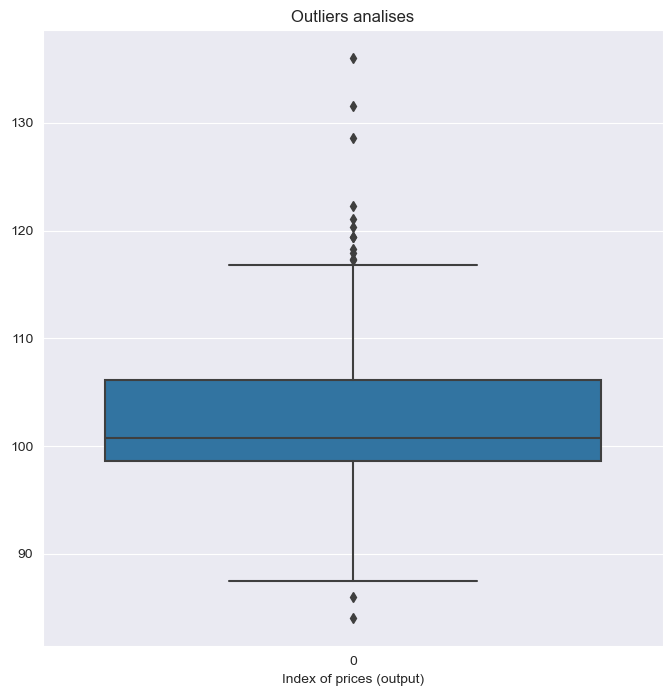

In [16]:
# visualize univariable outliers

fig = plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=df_ina_index['Price_Index'])
ax.set_xlabel('Index of prices (output)')
plt.title('Outliers analises')
plt.show()

In [17]:
def tukeys_method(df, feature):
    # calculate Q1 and Q3
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    print('Q1: ',q1)
    print('Q3: ',q3)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end corresponding with 1.5 IQR point
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    #print(inner_fence_ue)
    #outer fence lower and upper end corresponding with 3.0 IQR point
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_outer = []
    outliers_inner = []
    # outer fence
    for index, x in enumerate(df[feature]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_outer.append(index)
    # inner fence
    for index, x in enumerate(df[feature]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_inner.append(index)
    
    return outliers_outer, outliers_inner # return the index of the outliers in inner fence and outer fence
        


In [18]:
# Search for tukey fence on the target feature df_index['Price_Index']
outliers_outer_indexes, outliers_inner_indexes = tukeys_method(df_ina_index, 'Price_Index')

print('\nOuter index:  ', outliers_outer_indexes)
print('\nInner index:  ', outliers_inner_indexes)

Q1:  98.655
Q3:  106.1

Outer index:   [125, 153, 239]

Inner index:   [125, 153, 225, 228, 229, 234, 239, 242, 248, 250, 251, 351, 547, 575]


It is just tree observations out of the Outer Fence according to the Tukey Methods.

For this project it will consider this has a **low impact on the samples, and in the model**, therefore, it will **not change** values to any observations.

In [19]:
# It is just two observations is out of the Outer Fence according to the Tukey Methodhs

df_ina_index.iloc[[125, 153, 239]]


,Geo,Year,Price_Index
125,Cyprus,2004,128.6
153,Cyprus,2005,136.0
239,Lithuania,2008,131.6


### End Index of prices (input)

# Read data of Index of expenditure (output) by period


## Period 2015:  df_outa_2015

In [20]:
# read data Index of expenditure (output)  by period 2015

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi15_outa_2015.xlsx"


df_outa_2015 = pd.DataFrame()


# columns specific for df_outa_2015

# Fixing the columns names
column_fix = ['Geo', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

df_outa_2015 = readexcel(df_outa_2015, column_fix, readexcel_name)


# Cleaning and fixing columns df_outa_2015

# this is specific for each excel
df_outa_2015.drop(df_outa_2015.index[-6:], inplace=True)


df_outa_2015





https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi15_outa_2015.xlsx


,Geo,2015,2016,2017,2018,2019,2020,2021
10,European Union: 27 countries,100.0,98.46,103.97,102.97,103.43,102.46,108.96
11,Belgium,100.0,101.66,104.84,110.28,108.05,103.92,111.13
12,Bulgaria,100.0,96.07,94.94,93.53,92.68,99.24,115.99
13,Czechia,100.0,93.55,98.16,96.29,98.61,92.28,95.48
14,Denmark,100.0,94.66,102.87,96.52,102.94,103.62,104.30
15,Germany,100.0,98.31,106.37,104.81,105.78,101.89,107.60
16,Estonia,100.0,96.60,106.56,105.24,104.47,101.62,113.17
17,Ireland,100.0,95.31,106.32,103.49,101.45,102.71,111.90
18,Greece,100.0,98.04,98.58,97.77,97.72,97.83,107.58
19,Spain,100.0,96.65,101.75,99.44,94.57,95.08,100.60


In [21]:
df_outa_2015

,Geo,2015,2016,2017,2018,2019,2020,2021
10,European Union: 27 countries,100.0,98.46,103.97,102.97,103.43,102.46,108.96
11,Belgium,100.0,101.66,104.84,110.28,108.05,103.92,111.13
12,Bulgaria,100.0,96.07,94.94,93.53,92.68,99.24,115.99
13,Czechia,100.0,93.55,98.16,96.29,98.61,92.28,95.48
14,Denmark,100.0,94.66,102.87,96.52,102.94,103.62,104.30
15,Germany,100.0,98.31,106.37,104.81,105.78,101.89,107.60
16,Estonia,100.0,96.60,106.56,105.24,104.47,101.62,113.17
17,Ireland,100.0,95.31,106.32,103.49,101.45,102.71,111.90
18,Greece,100.0,98.04,98.58,97.77,97.72,97.83,107.58
19,Spain,100.0,96.65,101.75,99.44,94.57,95.08,100.60


## Period 2010:      df_outa_2010

In [22]:
# read data Index of expenditure (output)  by period 2010

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi10_outa_2010.xlsx"

df_outa_2010 = pd.DataFrame()


# columns specific for df_outa_2010

# Fixing the columns names
column_fix = ['Geo', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

df_outa_2010 = readexcel(df_outa_2010, column_fix, readexcel_name)


# Cleaning and fixing columns df_outa_2010

# this is specific for each excel
df_outa_2010.drop(df_outa_2010.index[-6:], inplace=True)


df_outa_2010



https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi10_outa_2010.xlsx


,Geo,2010,2011,2012,2013,2014,2015,2016,2017
10,European Union: 27 countries,100.0,107.4,111.0,112.3,104.4,102.1,100.9,105.8
11,Belgium,100.0,98.7,108.3,111.7,92.6,88.0,89.4,92.3
12,Bulgaria,100.0,119.6,135.1,110.8,107.9,113.5,109.3,107.4
13,Czechia,100.0,118.8,119.1,122.9,117.7,110.3,104.2,109.9
14,Denmark,100.0,111.5,117.2,121.4,107.4,100.9,96.8,103.7
15,Germany,100.0,110.6,114.0,113.5,103.6,99.6,99.0,105.4
16,Ireland,100.0,113.9,117.5,126.9,116.2,111.6,106.4,116.5
17,Greece,100.0,99.9,97.5,100.0,99.6,105.5,104.0,104.0
18,Spain,100.0,97.5,105.9,107.5,99.7,106.7,103.6,109.6
19,France,100.0,110.0,113.6,115.1,109.4,105.2,106.2,107.8


In [23]:
df_outa_2010

,Geo,2010,2011,2012,2013,2014,2015,2016,2017
10,European Union: 27 countries,100.0,107.4,111.0,112.3,104.4,102.1,100.9,105.8
11,Belgium,100.0,98.7,108.3,111.7,92.6,88.0,89.4,92.3
12,Bulgaria,100.0,119.6,135.1,110.8,107.9,113.5,109.3,107.4
13,Czechia,100.0,118.8,119.1,122.9,117.7,110.3,104.2,109.9
14,Denmark,100.0,111.5,117.2,121.4,107.4,100.9,96.8,103.7
15,Germany,100.0,110.6,114.0,113.5,103.6,99.6,99.0,105.4
16,Ireland,100.0,113.9,117.5,126.9,116.2,111.6,106.4,116.5
17,Greece,100.0,99.9,97.5,100.0,99.6,105.5,104.0,104.0
18,Spain,100.0,97.5,105.9,107.5,99.7,106.7,103.6,109.6
19,France,100.0,110.0,113.6,115.1,109.4,105.2,106.2,107.8


## Period 2005:  df_outa_2005

In [24]:
# read data Index of expenditure (output)  by period 2005

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi05_outa_2005.xlsx"

df_outa_2005 = pd.DataFrame()


# columns specific for df_outa_2005

# Fixing the columns names
column_fix = ['Geo', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']

df_outa_2005 = readexcel(df_outa_2005, column_fix, readexcel_name)


# Cleaning and fixing columns df_outa_2005

# this is specific for each excel
df_outa_2005.drop(df_outa_2005.index[-5:], inplace=True)


df_outa_2005


https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi05_outa_2005.xlsx


,Geo,2005,2006,2007,2008,2009,2010,2011,2012
10,European Union: 27 countries,100.0,102.7,110.4,112.0,98.2,104.1,110.7,114.1
11,Belgium,100.0,111.2,109.2,103.6,92.0,97.5,96.6,105.0
12,Bulgaria,100.0,100.7,117.5,117.3,90.9,98.1,108.5,116.5
13,Czechia,100.0,98.6,108.8,110.7,84.0,88.7,101.2,102.7
14,Denmark,100.0,102.1,104.2,112.0,93.7,100.5,111.3,117.2
15,Germany,100.0,105.4,115.2,116.3,93.9,106.0,116.7,119.7
16,Estonia,100.0,98.1,107.2,101.3,78.5,92.4,104.0,101.2
17,Ireland,100.0,101.1,106.5,111.4,94.5,105.8,119.9,122.1
18,Greece,100.0,104.1,111.7,103.6,100.0,108.4,104.1,98.0
19,Spain,100.0,94.9,97.5,96.6,85.9,89.5,87.4,94.0


In [25]:
df_outa_2005

,Geo,2005,2006,2007,2008,2009,2010,2011,2012
10,European Union: 27 countries,100.0,102.7,110.4,112.0,98.2,104.1,110.7,114.1
11,Belgium,100.0,111.2,109.2,103.6,92.0,97.5,96.6,105.0
12,Bulgaria,100.0,100.7,117.5,117.3,90.9,98.1,108.5,116.5
13,Czechia,100.0,98.6,108.8,110.7,84.0,88.7,101.2,102.7
14,Denmark,100.0,102.1,104.2,112.0,93.7,100.5,111.3,117.2
15,Germany,100.0,105.4,115.2,116.3,93.9,106.0,116.7,119.7
16,Estonia,100.0,98.1,107.2,101.3,78.5,92.4,104.0,101.2
17,Ireland,100.0,101.1,106.5,111.4,94.5,105.8,119.9,122.1
18,Greece,100.0,104.1,111.7,103.6,100.0,108.4,104.1,98.0
19,Spain,100.0,94.9,97.5,96.6,85.9,89.5,87.4,94.0


## Period 2000:  df_outa_2000

In [26]:

# read data Index of expenditure (output)  by period 2000

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi00_outa_2000.xlsx"


df_outa_2000 = pd.DataFrame()


# columns specific for df_outa_2000

# Fixing the columns names
column_fix = ['Geo', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']

df_outa_2000 = readexcel(df_outa_2000, column_fix, readexcel_name)


# Cleaning and fixing columns df_outa_2000

# this is specific for each excel
df_outa_2000.drop(df_outa_2000.index[-5:], inplace=True)


df_outa_2000


https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/apri_pi00_outa_2000.xlsx


,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008
10,European Union: 27 countries,100.0,102.7,97.1,98.2,96.1,92.0,94.6,100.8,102.4
11,Belgium,100.0,102.0,91.0,92.5,92.7,91.4,97.7,98.0,90.8
12,Bulgaria,100.0,108.0,90.2,90.1,94.3,76.6,74.0,82.9,80.7
13,Czechia,100.0,106.1,94.4,91.0,94.7,87.2,86.3,97.9,100.3
14,Denmark,100.0,105.0,92.4,86.5,88.0,85.2,88.5,89.0,96.6
15,Germany,100.0,105.2,96.9,97.1,93.9,91.3,97.6,104.9,105.0
16,Estonia,100.0,NaN,NaN,NaN,117.4,118.0,117.9,125.4,111.4
17,Ireland,100.0,100.4,91.8,87.9,87.9,86.4,88.4,94.4,94.9
18,Greece,100.0,102.4,105.5,110.9,105.6,105.2,108.5,112.8,111.7
19,Spain,100.0,100.2,94.2,96.3,94.4,94.2,90.1,92.9,91.9


# Join the data of Index of prices (output) and create NEW DF by period 2000 to 2021

Groups and join the data frames: df_outa_2015, df_outa_2010, df_outa_2005, and df_outa_2000 in order to create a DF from all periods from 2000 to 2021.

Join: it is a inner join in which the "priority" is the newest DF because has the most recent calculation of the index of prices, means from df_outa_2015. 

https://pandas.pydata.org/docs/user_guide/merging.html

**Important**: Joins will be set up in several steps in order to bring clarity and a better understanding of the code. 


In [27]:
# Step 1: Join df_outa_2015 with df_outa_2010
df_outa = pd.merge(df_outa_2010[['Geo', '2011', '2012', '2013', '2014', '2015']],
         df_outa_2015[['Geo', '2016', '2017', '2018', '2019', '2020', '2021']],  
         how='right', 
         on = 'Geo')
df_outa


,Geo,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,107.4,111.0,112.3,104.4,102.1,98.46,103.97,102.97,103.43,102.46,108.96
1,Belgium,98.7,108.3,111.7,92.6,88.0,101.66,104.84,110.28,108.05,103.92,111.13
2,Bulgaria,119.6,135.1,110.8,107.9,113.5,96.07,94.94,93.53,92.68,99.24,115.99
3,Czechia,118.8,119.1,122.9,117.7,110.3,93.55,98.16,96.29,98.61,92.28,95.48
4,Denmark,111.5,117.2,121.4,107.4,100.9,94.66,102.87,96.52,102.94,103.62,104.30
5,Germany,110.6,114.0,113.5,103.6,99.6,98.31,106.37,104.81,105.78,101.89,107.60
6,Estonia,NaN,NaN,NaN,NaN,NaN,96.60,106.56,105.24,104.47,101.62,113.17
7,Ireland,113.9,117.5,126.9,116.2,111.6,95.31,106.32,103.49,101.45,102.71,111.90
8,Greece,99.9,97.5,100.0,99.6,105.5,98.04,98.58,97.77,97.72,97.83,107.58
9,Spain,97.5,105.9,107.5,99.7,106.7,96.65,101.75,99.44,94.57,95.08,100.60


In [28]:
# Step 2: Join previous result with df_outa_2005
df_outa = pd.merge(df_outa_2005[['Geo', '2006', '2007', '2008', '2009', '2010']],
         df_outa,
         how='right', 
         on = 'Geo')
df_outa

,Geo,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,102.7,110.4,112.0,98.2,104.1,107.4,111.0,112.3,104.4,102.1,98.46,103.97,102.97,103.43,102.46,108.96
1,Belgium,111.2,109.2,103.6,92.0,97.5,98.7,108.3,111.7,92.6,88.0,101.66,104.84,110.28,108.05,103.92,111.13
2,Bulgaria,100.7,117.5,117.3,90.9,98.1,119.6,135.1,110.8,107.9,113.5,96.07,94.94,93.53,92.68,99.24,115.99
3,Czechia,98.6,108.8,110.7,84.0,88.7,118.8,119.1,122.9,117.7,110.3,93.55,98.16,96.29,98.61,92.28,95.48
4,Denmark,102.1,104.2,112.0,93.7,100.5,111.5,117.2,121.4,107.4,100.9,94.66,102.87,96.52,102.94,103.62,104.30
5,Germany,105.4,115.2,116.3,93.9,106.0,110.6,114.0,113.5,103.6,99.6,98.31,106.37,104.81,105.78,101.89,107.60
6,Estonia,98.1,107.2,101.3,78.5,92.4,NaN,NaN,NaN,NaN,NaN,96.60,106.56,105.24,104.47,101.62,113.17
7,Ireland,101.1,106.5,111.4,94.5,105.8,113.9,117.5,126.9,116.2,111.6,95.31,106.32,103.49,101.45,102.71,111.90
8,Greece,104.1,111.7,103.6,100.0,108.4,99.9,97.5,100.0,99.6,105.5,98.04,98.58,97.77,97.72,97.83,107.58
9,Spain,94.9,97.5,96.6,85.9,89.5,97.5,105.9,107.5,99.7,106.7,96.65,101.75,99.44,94.57,95.08,100.60


In [29]:
# Step 3: Join previous result with df_outa_2000

# Using right join because df_outa_2000 does not has data from Croatia

df_outa = pd.merge(df_outa_2000[['Geo', '2000', '2001', '2002', '2003', '2004', '2005']],
         df_outa,
         how='right', # using right join
         on = 'Geo')
df_outa


,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,102.7,97.1,98.2,96.1,92.0,102.7,110.4,112.0,...,111.0,112.3,104.4,102.1,98.46,103.97,102.97,103.43,102.46,108.96
1,Belgium,100.0,102.0,91.0,92.5,92.7,91.4,111.2,109.2,103.6,...,108.3,111.7,92.6,88.0,101.66,104.84,110.28,108.05,103.92,111.13
2,Bulgaria,100.0,108.0,90.2,90.1,94.3,76.6,100.7,117.5,117.3,...,135.1,110.8,107.9,113.5,96.07,94.94,93.53,92.68,99.24,115.99
3,Czechia,100.0,106.1,94.4,91.0,94.7,87.2,98.6,108.8,110.7,...,119.1,122.9,117.7,110.3,93.55,98.16,96.29,98.61,92.28,95.48
4,Denmark,100.0,105.0,92.4,86.5,88.0,85.2,102.1,104.2,112.0,...,117.2,121.4,107.4,100.9,94.66,102.87,96.52,102.94,103.62,104.30
5,Germany,100.0,105.2,96.9,97.1,93.9,91.3,105.4,115.2,116.3,...,114.0,113.5,103.6,99.6,98.31,106.37,104.81,105.78,101.89,107.60
6,Estonia,100.0,NaN,NaN,NaN,117.4,118.0,98.1,107.2,101.3,...,NaN,NaN,NaN,NaN,96.60,106.56,105.24,104.47,101.62,113.17
7,Ireland,100.0,100.4,91.8,87.9,87.9,86.4,101.1,106.5,111.4,...,117.5,126.9,116.2,111.6,95.31,106.32,103.49,101.45,102.71,111.90
8,Greece,100.0,102.4,105.5,110.9,105.6,105.2,104.1,111.7,103.6,...,97.5,100.0,99.6,105.5,98.04,98.58,97.77,97.72,97.83,107.58
9,Spain,100.0,100.2,94.2,96.3,94.4,94.2,94.9,97.5,96.6,...,105.9,107.5,99.7,106.7,96.65,101.75,99.44,94.57,95.08,100.60


# Data wrangling: cleaning, missing values and outliers

## Missing values


Basically, the price index illustrates how the price of a product or of a basket of products 
has changed since the base period.

The **base price of an index is 100** by agreement (according to Eurostat), 
meaning that, for instance, an index equal to 110 reflects an increase in the absolute price of 10% and an index equal to 95 a decrease of 5%.

Please see:  https://ec.europa.eu/eurostat/cache/metadata/en/apri_pi_esms.htm

This value: 100, will be considered in order to fix the missing values, meaning that any **missing value will be substituted by the base price** instead of the mean or median as conventionally used.

In [30]:
# Using Pandas

base_price=100.0  # base price of an index is 100 by agreement

df_outa = df_outa.fillna(base_price)

df_outa

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,102.7,97.1,98.2,96.1,92.0,102.7,110.4,112.0,...,111.0,112.3,104.4,102.1,98.46,103.97,102.97,103.43,102.46,108.96
1,Belgium,100.0,102.0,91.0,92.5,92.7,91.4,111.2,109.2,103.6,...,108.3,111.7,92.6,88.0,101.66,104.84,110.28,108.05,103.92,111.13
2,Bulgaria,100.0,108.0,90.2,90.1,94.3,76.6,100.7,117.5,117.3,...,135.1,110.8,107.9,113.5,96.07,94.94,93.53,92.68,99.24,115.99
3,Czechia,100.0,106.1,94.4,91.0,94.7,87.2,98.6,108.8,110.7,...,119.1,122.9,117.7,110.3,93.55,98.16,96.29,98.61,92.28,95.48
4,Denmark,100.0,105.0,92.4,86.5,88.0,85.2,102.1,104.2,112.0,...,117.2,121.4,107.4,100.9,94.66,102.87,96.52,102.94,103.62,104.30
5,Germany,100.0,105.2,96.9,97.1,93.9,91.3,105.4,115.2,116.3,...,114.0,113.5,103.6,99.6,98.31,106.37,104.81,105.78,101.89,107.60
6,Estonia,100.0,100.0,100.0,100.0,117.4,118.0,98.1,107.2,101.3,...,100.0,100.0,100.0,100.0,96.60,106.56,105.24,104.47,101.62,113.17
7,Ireland,100.0,100.4,91.8,87.9,87.9,86.4,101.1,106.5,111.4,...,117.5,126.9,116.2,111.6,95.31,106.32,103.49,101.45,102.71,111.90
8,Greece,100.0,102.4,105.5,110.9,105.6,105.2,104.1,111.7,103.6,...,97.5,100.0,99.6,105.5,98.04,98.58,97.77,97.72,97.83,107.58
9,Spain,100.0,100.2,94.2,96.3,94.4,94.2,94.9,97.5,96.6,...,105.9,107.5,99.7,106.7,96.65,101.75,99.44,94.57,95.08,100.60


# Analysis Outliers Index of prices (input):  df_outa


In [31]:
# melt_pivot

df_outa_index = df_outa.melt(id_vars=["Geo"],
                 var_name="Year",
                 value_name="Price_Index")


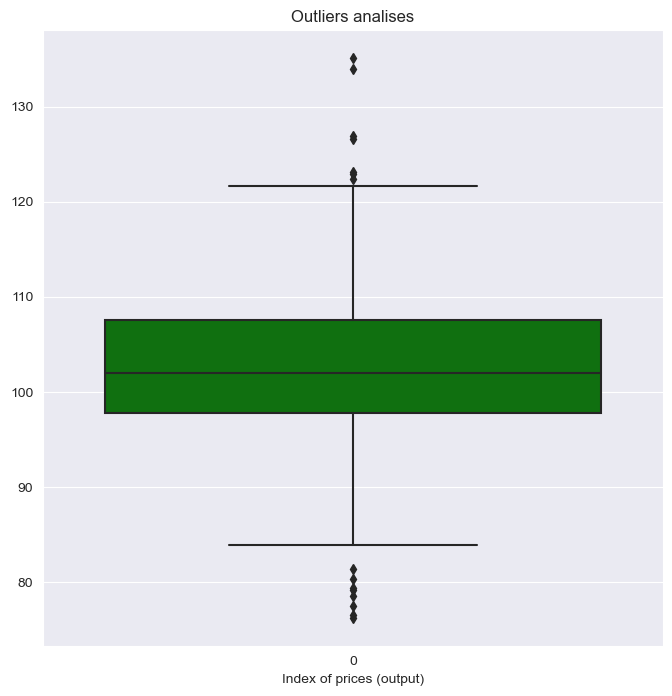

In [32]:
# visualize univariable outliers

fig = plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=df_outa_index['Price_Index'], color='green') 
# used the colour green to be different to the analysis of input data: df_ina

ax.set_xlabel('Index of prices (output)')
plt.title('Outliers analises')
plt.show()


In [33]:
# Search for tukey fence on the target feature df_outa_index['Price_Index']
outliers_outer_indexes, outliers_inner_indexes = tukeys_method(df_outa_index, 'Price_Index')

print('\nOuter index:  ', outliers_outer_indexes)
print('\nInner index:  ', outliers_inner_indexes)


Q1:  97.79249999999999
Q3:  107.6

Outer index:   []

Inner index:   [129, 137, 142, 157, 165, 213, 247, 258, 266, 277, 338, 353, 367, 371, 611]


It is no observations out of the Outer Fence according to the Tukey Methods.

For this project it will consider this has a **low impact on the samples, and in the model**, therefore, it will **not change** values to any observations.


## Anual evolution of the index of producer prices of agricultural products (output) by period 2000-2021: Irland vs EU

In [34]:
df_outa

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,102.7,97.1,98.2,96.1,92.0,102.7,110.4,112.0,...,111.0,112.3,104.4,102.1,98.46,103.97,102.97,103.43,102.46,108.96
1,Belgium,100.0,102.0,91.0,92.5,92.7,91.4,111.2,109.2,103.6,...,108.3,111.7,92.6,88.0,101.66,104.84,110.28,108.05,103.92,111.13
2,Bulgaria,100.0,108.0,90.2,90.1,94.3,76.6,100.7,117.5,117.3,...,135.1,110.8,107.9,113.5,96.07,94.94,93.53,92.68,99.24,115.99
3,Czechia,100.0,106.1,94.4,91.0,94.7,87.2,98.6,108.8,110.7,...,119.1,122.9,117.7,110.3,93.55,98.16,96.29,98.61,92.28,95.48
4,Denmark,100.0,105.0,92.4,86.5,88.0,85.2,102.1,104.2,112.0,...,117.2,121.4,107.4,100.9,94.66,102.87,96.52,102.94,103.62,104.30
5,Germany,100.0,105.2,96.9,97.1,93.9,91.3,105.4,115.2,116.3,...,114.0,113.5,103.6,99.6,98.31,106.37,104.81,105.78,101.89,107.60
6,Estonia,100.0,100.0,100.0,100.0,117.4,118.0,98.1,107.2,101.3,...,100.0,100.0,100.0,100.0,96.60,106.56,105.24,104.47,101.62,113.17
7,Ireland,100.0,100.4,91.8,87.9,87.9,86.4,101.1,106.5,111.4,...,117.5,126.9,116.2,111.6,95.31,106.32,103.49,101.45,102.71,111.90
8,Greece,100.0,102.4,105.5,110.9,105.6,105.2,104.1,111.7,103.6,...,97.5,100.0,99.6,105.5,98.04,98.58,97.77,97.72,97.83,107.58
9,Spain,100.0,100.2,94.2,96.3,94.4,94.2,94.9,97.5,96.6,...,105.9,107.5,99.7,106.7,96.65,101.75,99.44,94.57,95.08,100.60


#### Function for melt DF's

In [35]:
# function for melt

# melt_pivot all df's

def melt_pivot(df, v):
    df = df.melt(id_vars=['Geo'],
                 var_name='Year',
                 value_name=v)
    df[v] = df[v].astype(float)
    return df

In [36]:
# melt_pivot


df_outa_t = melt_pivot(df_outa, 'Price_Index')

#df_outa_t = df_outa.melt(id_vars=['Geo'],
#                 var_name='Year',
#                 value_name="Price_Index")
#df_outa_T['Year'] = df_outa_T['Year'].astype(int)
#df_outa_T['Price_Index'] = df_outa_T['Price_Index'].astype(float)
df_outa_t

,Geo,Year,Price_Index
0,European Union: 27 countries,2000,100.00
1,Belgium,2000,100.00
2,Bulgaria,2000,100.00
3,Czechia,2000,100.00
4,Denmark,2000,100.00
...,...,...,...
611,Romania,2021,123.11
612,Slovenia,2021,109.37
613,Slovakia,2021,104.06
614,Finland,2021,101.74


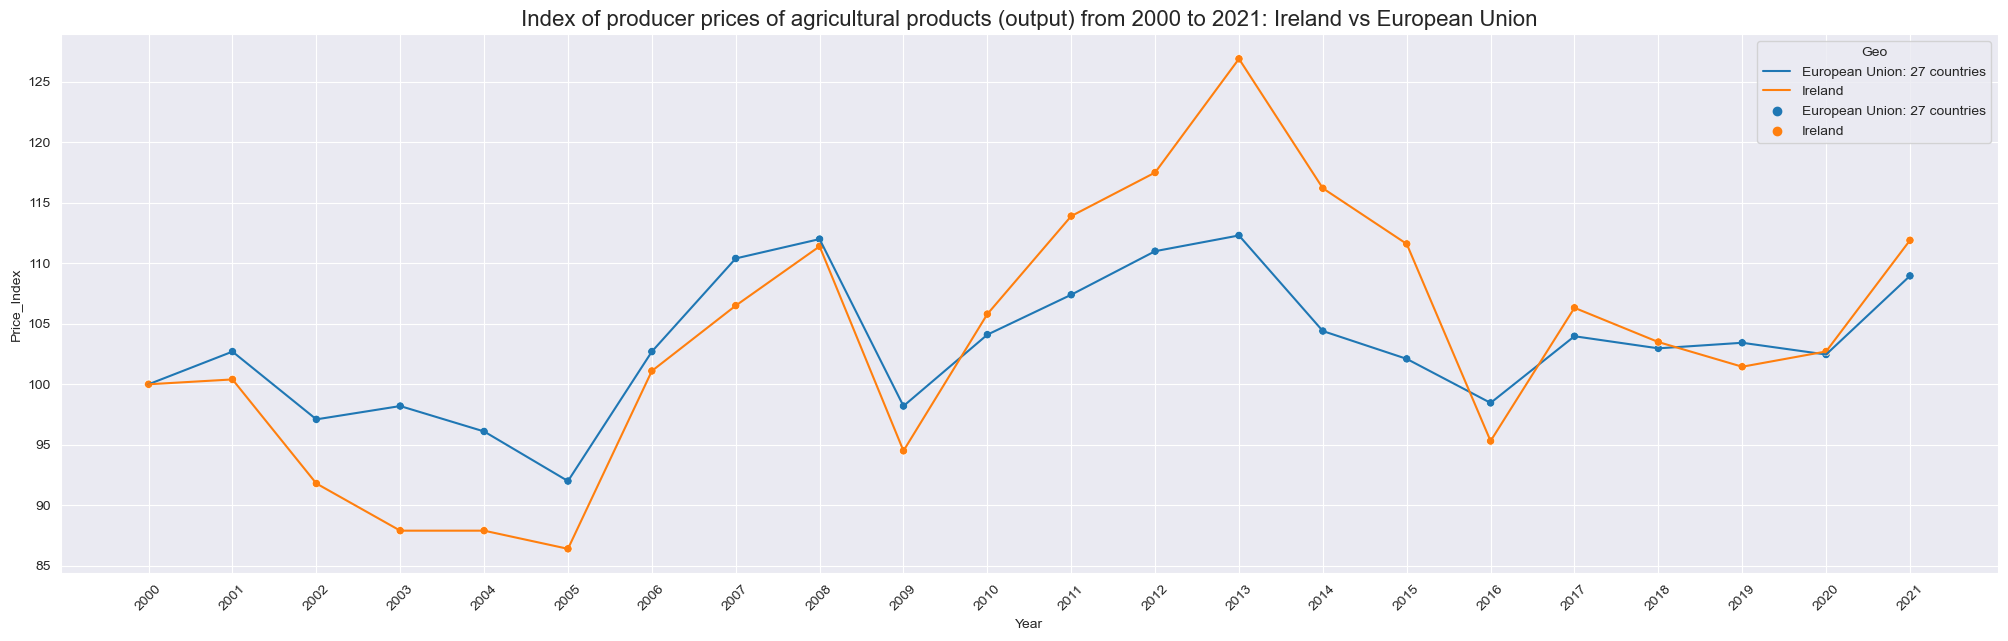

In [37]:
df_tmp = df_outa_t[(df_outa_t['Geo']=='Ireland') | (df_outa_t['Geo']=='European Union: 27 countries')]

plt.figure(figsize=(25,7))
sns.lineplot(x=df_tmp["Year"],y=df_tmp['Price_Index'],hue= df_tmp['Geo'])
sns.scatterplot(x=df_tmp["Year"],y=df_tmp['Price_Index'],hue=df_tmp['Geo'])
plt.xticks(rotation=45);
plt.title("Index of producer prices of agricultural products (output) from 2000 to 2021: Ireland vs European Union",fontsize=16);
plt.show()


## Anual evolution of the Index of variation of the expenditure incurred by farmers(input) by period 2000-2021: Irland vs EU

In [38]:
df_ina

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,101.4,99.7,99.4,101.5,100.7,101.2,106.1,116.8,...,108.5,108.4,104.8,102.7,97.84,97.95,99.60,99.68,98.11,105.03
1,Belgium,100.0,100.2,99.1,97.7,96.2,97.6,103.1,111.7,122.3,...,111.1,110.2,101.7,99.3,97.09,98.35,99.59,100.08,98.22,107.70
2,Bulgaria,100.0,100.0,100.0,100.0,100.0,100.0,95.9,98.7,100.6,...,110.5,109.0,106.0,103.4,97.99,98.35,99.63,98.96,94.95,102.20
3,Czechia,100.0,100.1,97.4,96.0,99.8,97.7,98.6,101.1,104.1,...,106.4,108.1,106.0,103.0,96.23,95.05,94.96,95.18,92.46,94.35
4,Denmark,100.0,103.5,102.2,99.0,101.2,101.0,100.6,107.0,121.1,...,108.9,112.4,111.6,109.5,100.22,99.86,101.33,101.72,100.83,105.18
5,Germany,100.0,102.1,100.3,99.5,101.3,99.8,102.2,107.6,118.3,...,110.8,111.1,106.5,104.9,97.91,97.94,99.81,100.09,99.72,104.21
6,Estonia,100.0,100.0,100.0,100.0,100.0,100.0,101.5,103.6,103.4,...,100.0,100.0,100.0,100.0,97.06,94.44,94.17,93.78,93.11,95.73
7,Ireland,100.0,100.4,97.5,96.0,97.1,98.9,100.5,103.8,115.4,...,111.1,113.4,108.8,106.6,98.53,98.50,101.71,103.00,101.40,107.08
8,Greece,100.0,98.4,97.4,97.9,102.2,103.8,100.5,103.9,110.6,...,107.0,107.3,106.0,104.8,98.10,99.43,100.84,100.36,98.76,105.40
9,Spain,100.0,100.0,97.4,95.7,96.5,95.1,99.7,104.4,115.3,...,110.3,108.7,105.3,105.0,97.06,95.54,97.25,97.57,95.59,104.76


In [39]:
# melt_pivot

# calling function melt_pivot

df_ina_t = melt_pivot(df_ina, 'Expenditure_Index')

df_ina_t


,Geo,Year,Expenditure_Index
0,European Union: 27 countries,2000,100.00
1,Belgium,2000,100.00
2,Bulgaria,2000,100.00
3,Czechia,2000,100.00
4,Denmark,2000,100.00
...,...,...,...
611,Romania,2021,107.23
612,Slovenia,2021,106.88
613,Slovakia,2021,95.70
614,Finland,2021,105.16


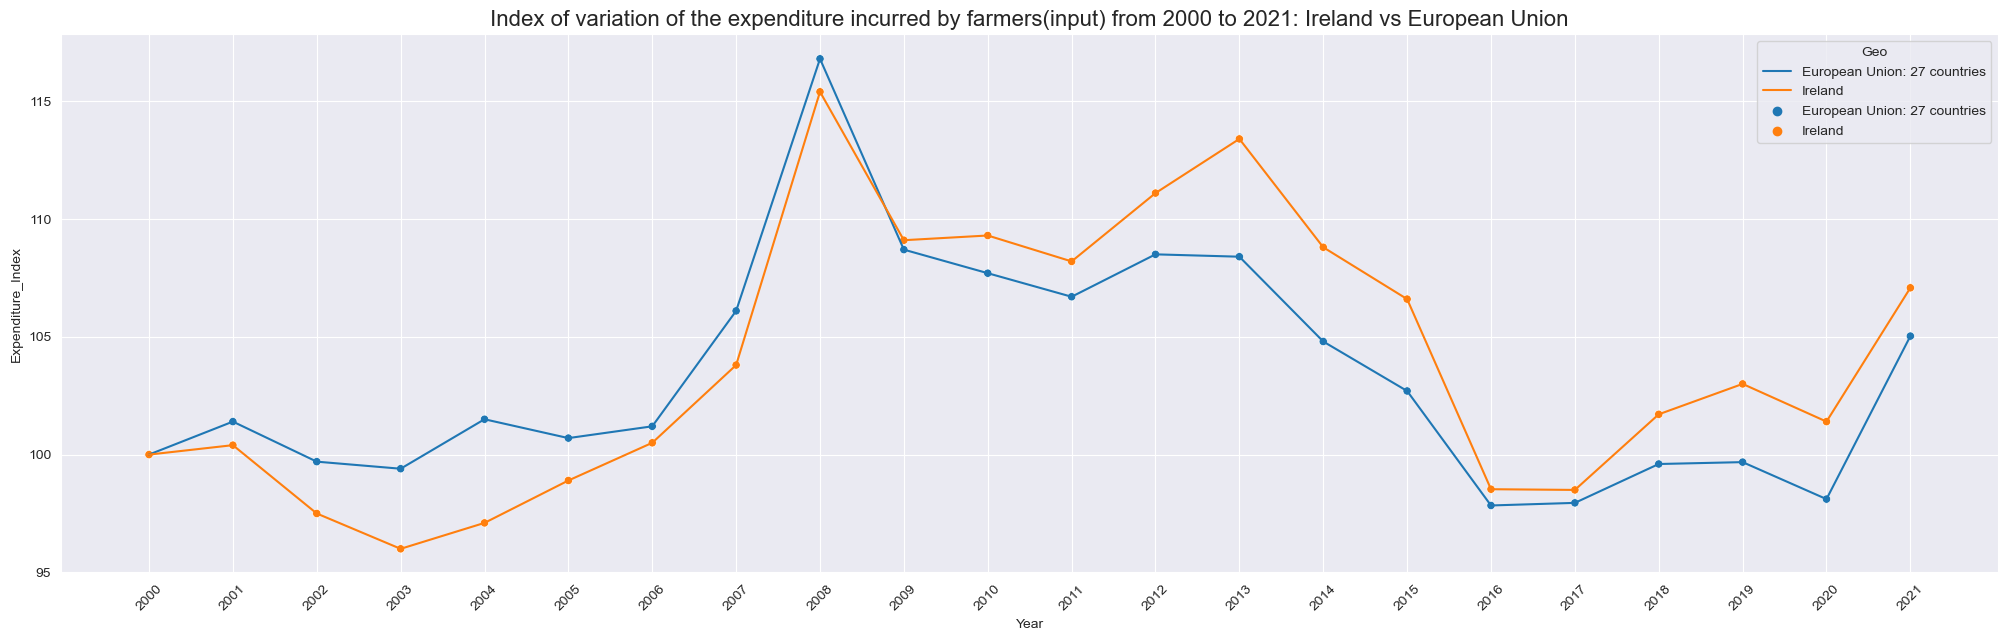

In [40]:
df_tmp = df_ina_t[(df_ina_t['Geo']=='Ireland') | (df_ina_t['Geo']=='European Union: 27 countries')]

plt.figure(figsize=(25,7))
sns.lineplot(x=df_tmp["Year"],y=df_tmp['Expenditure_Index'],hue= df_tmp['Geo'])
sns.scatterplot(x=df_tmp["Year"],y=df_tmp['Expenditure_Index'],hue=df_tmp['Geo'])
plt.xticks(rotation=45);
plt.title("Index of variation of the expenditure incurred by farmers(input) from 2000 to 2021: Ireland vs European Union",fontsize=16);
plt.show()


### End data of Index of prices (output)

# GDP - Gross domestic product on output, expenditure and income

All those indexes are impacted by other economical factors but in particular by the GDP - Gross domestic product on output, expenditure and income.

Eurostat publishes annual and quarterly national accounts use and input-output tables, which are each presented with associated metadata with the index of prices. Even though consistency checks are a major aspect of data validation, temporary (usually limited) inconsistencies between datasets may occur, mainly due to vintage effects.

Data are available from 2010 in Eurostat.

In order to maintain the consistency and coherence of the data in this project, its development a second part of the analysis from 2010 to 2021.

https://ec.europa.eu/eurostat/cache/metadata/en/namq_10_esms.htm



In [41]:
# function to read file excel downloaded from index of prices input and output

# https://ec.europa.eu/eurostat/web/agriculture/data/database


def readexcelGDP(df, readexcel_name):
    
    # link to GitHub
    link = readexcel_name
    print(link)
    # to read just one sheet to dataframe:
    df = pd.read_excel(link,'Sheet 1')
    
    # Cleaning and fixing columns

    # delete row innecesaries (headers of the original excel that do not contain relevant data)
    
    df.drop(df.index[0:8], inplace=True)
    #df.drop(df.index[-8:], inplace=True)
    column = df.iloc[0].values.tolist()
    df.columns = column
    df = df[df.columns.dropna()]
    df.iloc[0:2]
    df.drop(df.index[0:2], inplace=True)
 
    # Fixing the columns names

    df.rename(columns={'TIME':'Geo'}, inplace=True)


    # Fixing the value of standard columns
    df['Geo'].iloc[0] = 'European Union: 27 countries'
    df['Geo'] = df['Geo'].replace('Germany (until 1990 former territory of the FRG)', 'Germany')
    
    # convert to numerical, objects values

    df.loc[:, df.columns != 'Geo'] = df.loc[:, df.columns != 'Geo'].apply(pd.to_numeric, errors='coerce')
    # use this option to convert "special" characters to NaN
    # invalid parsing will be set as NaN
    df = df.apply(pd.to_numeric, errors='ignore')
    # Convert all columns that can be converted into float 
    # Error were raised because their type was Object  
    
    return df


In [42]:
# function to read file excel downloaded from Gross domestic product on output, expenditure and income

# https://ec.europa.eu/eurostat/cache/metadata/en/namq_10_esms.htm

# Read data GDP by period 2010-2021

# Percentage change on previous period

readexcel_name = "https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/namq_10_gdp_2010.xlsx"

df_gdp_2010= pd.DataFrame()

df_gdp_2010 = readexcelGDP(df_gdp_2010, readexcel_name)

# delete row unnecessaries (bottom of the original excel that does NOT contain relevant data)
# this is specific for each excel
df_gdp_2010.drop(df_gdp_2010.index[-6:], inplace=True)

df_gdp_2010

    

https://github.com/sba22223nestorpereira/CCT_sba22223nestorpereira/raw/data/namq_10_gdp_2010.xlsx


,Geo,2010-Q1,2010-Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,2011-Q4,2012-Q1,...,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3
10,European Union: 27 countries,0.1,0.2,-0.1,-0.2,-0.2,0.1,0.2,-0.4,-0.2,...,-11.1,11.5,-0.1,0.2,1.9,2.2,0.7,0.7,0.7,0.4
11,Belgium,0.2,0.3,0.2,0.2,0.0,0.2,0.3,0.3,0.2,...,-11.4,11.7,-0.5,1.4,1.7,2.3,0.6,0.6,0.5,0.2
12,Bulgaria,1.0,0.1,-0.2,0.7,-0.2,1.0,0.1,-0.1,0.7,...,-4.8,3.6,1.8,2.7,1.3,1.9,1.5,0.4,0.8,0.6
13,Czechia,0.3,-0.2,-0.4,-0.2,-0.5,0.3,-0.2,0.1,-0.2,...,-8.8,7.0,1.1,-0.5,1.4,1.7,0.8,0.6,0.4,-0.2
14,Denmark,1.0,-1.2,0.1,-0.1,0.1,1.0,-1.2,0.8,-0.1,...,-6.3,5.9,0.0,1.0,1.9,1.0,2.5,-0.5,0.8,0.5
15,Germany,0.1,0.9,0.3,0.2,0.2,0.1,0.9,-0.3,0.2,...,-9.5,9.0,0.6,-1.5,1.9,0.8,0.0,0.8,0.1,0.4
16,Estonia,1.9,1.7,0.5,0.6,1.2,1.9,1.7,0.0,0.6,...,-6.8,4.8,2.7,2.6,2.9,0.7,0.8,0.0,-1.3,-1.8
17,Ireland,1.2,-1.4,-1.0,0.0,1.3,1.2,-1.4,-0.2,0.0,...,-5.6,12.9,-4.6,8.9,1.9,3.8,-1.1,7.0,2.2,2.3
18,Greece,-1.8,-2.0,-1.5,-0.3,-1.7,-1.8,-2.0,-4.5,-0.3,...,-13.4,5.3,4.1,3.1,1.3,3.6,0.6,2.2,0.6,-0.5
19,Spain,-0.3,-0.6,-0.5,-0.9,-1.0,-0.3,-0.6,-0.7,-0.9,...,-17.8,16.6,-0.1,-0.2,1.4,3.1,2.3,-0.2,1.5,0.2


### GDP by period 2010-2021: percentage change on previous period

Data of GDP: percentage change on previous period by period 2010 (means based from 2010-2021)

The second part of the analysis includes data from the GDP, available from 2010. Therefore, it will be chosen the quarters from 2010 to 2021, and generate a **sentimental feature** which indicates the general opinion of the experts about the change in the GDP and how this impact the index of prices: positive or negative.


### Generate a sentimental feature

It will be added a categorical feature based on the general opinion of the experts in GDP related when the GDP is negative or positive. 

Most economists today agree that a small amount of inflation about 1% to 2% is beneficial, and is essential that the GDP of the countries needs to grow. However, if GDP growth is higher than 2.5% to 3.5% could be dangerous, because causes inflation or even worse hyperinflation. 

This economic parameter is essential in the index of producer prices of agricultural products (output) and the index of purchase prices of agricultural production (input) for Ireland and all the countries of the EU.

Therefore, **GDP between 0% to 3.5%** could be considered **"positive"**, in another way,  out of this range, could be considered **"negative"**.

This **rule will be applied** to this project.

**Justification**, Please see: 

https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/gross-domestic-product-GDP

https://www.investopedia.com/articles/06/gdpinflation.asp

https://www.investopedia.com/terms/f/farmprices.asp

https://www.kaggle.com/code/kirolosatef/stock-prediction-using-twitter-sentiment-analysis#Load-the-dataset

.


## Preparing the data for analysis anual of GDP by period 2010-2021

All data available, for all countries, is by year, therefore, it is necessary to regroup all data about GDP by year instead of a quarter. In order to do that, it will substitute the values of the four(4) quarters by the mean of the GDP per year for each country. 
That means creating a new feature equal to the mean of the 4 quarters, for example, the GDP for 2010-Q1,  2010-Q2, 2010-Q3, and 2010-Q4, will be substituted by **only one feature per year**, 2010, per country. 

It is just for data from **2010 to 2021**.




#### Rename the columns

In [43]:
df_gdp_2010.columns
df_gdp_2010.rename(columns = lambda x: x.replace('-Q1', ''),inplace=True)
df_gdp_2010.rename(columns = lambda x: x.replace('-Q2', ''),inplace=True)
df_gdp_2010.rename(columns = lambda x: x.replace('-Q3', ''),inplace=True)
df_gdp_2010.rename(columns = lambda x: x.replace('-Q4', ''),inplace=True)

df_gdp_2010

,Geo,2010,2010,2010,2010,2011,2011,2011,2011,2012,...,2020,2020,2020,2021,2021,2021,2021,2022,2022,2022
10,European Union: 27 countries,0.1,0.2,-0.1,-0.2,-0.2,0.1,0.2,-0.4,-0.2,...,-11.1,11.5,-0.1,0.2,1.9,2.2,0.7,0.7,0.7,0.4
11,Belgium,0.2,0.3,0.2,0.2,0.0,0.2,0.3,0.3,0.2,...,-11.4,11.7,-0.5,1.4,1.7,2.3,0.6,0.6,0.5,0.2
12,Bulgaria,1.0,0.1,-0.2,0.7,-0.2,1.0,0.1,-0.1,0.7,...,-4.8,3.6,1.8,2.7,1.3,1.9,1.5,0.4,0.8,0.6
13,Czechia,0.3,-0.2,-0.4,-0.2,-0.5,0.3,-0.2,0.1,-0.2,...,-8.8,7.0,1.1,-0.5,1.4,1.7,0.8,0.6,0.4,-0.2
14,Denmark,1.0,-1.2,0.1,-0.1,0.1,1.0,-1.2,0.8,-0.1,...,-6.3,5.9,0.0,1.0,1.9,1.0,2.5,-0.5,0.8,0.5
15,Germany,0.1,0.9,0.3,0.2,0.2,0.1,0.9,-0.3,0.2,...,-9.5,9.0,0.6,-1.5,1.9,0.8,0.0,0.8,0.1,0.4
16,Estonia,1.9,1.7,0.5,0.6,1.2,1.9,1.7,0.0,0.6,...,-6.8,4.8,2.7,2.6,2.9,0.7,0.8,0.0,-1.3,-1.8
17,Ireland,1.2,-1.4,-1.0,0.0,1.3,1.2,-1.4,-0.2,0.0,...,-5.6,12.9,-4.6,8.9,1.9,3.8,-1.1,7.0,2.2,2.3
18,Greece,-1.8,-2.0,-1.5,-0.3,-1.7,-1.8,-2.0,-4.5,-0.3,...,-13.4,5.3,4.1,3.1,1.3,3.6,0.6,2.2,0.6,-0.5
19,Spain,-0.3,-0.6,-0.5,-0.9,-1.0,-0.3,-0.6,-0.7,-0.9,...,-17.8,16.6,-0.1,-0.2,1.4,3.1,2.3,-0.2,1.5,0.2


In [44]:
# Period under analysis: from 2010 to 2021

years = ('2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021')


In [45]:
# Create a new DF for the means of the GDP by countries

df_gdp = df_gdp_2010.copy() 
    

#### Create a new DF for the means of the GDP by countries

In [46]:
# Transform data in order to create the DF with means of GDP by countries

for y in years: 
    i = 'y'+y
    df_gdp[i] = df_gdp[y].mean(axis=1) # create columns with means
    df_gdp.drop([y],axis=1, inplace=True)
    df_gdp.rename(columns = lambda x: x.replace('y', ''),inplace=True)
    df_gdp[y] = df_gdp[y].map('{:,.2f}'.format) # format values 
    df_gdp[y] = df_gdp[y].astype(float)


In [47]:
# In order to maintain coherence between the years: period from 2010 to 2021, 
# it will be deleted the columns about the year 2022.

df_gdp.drop(['2022'],axis=1, inplace=True) # year 2022 


In [48]:
df_gdp

,Geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
10,European Union: 27 countries,0.00,-0.08,-0.23,0.20,0.45,0.55,0.53,0.80,0.38,0.38,-0.65,1.25
11,Belgium,0.22,0.20,0.10,0.20,0.47,0.45,0.33,0.40,0.57,0.53,-0.78,1.50
12,Bulgaria,0.40,0.20,-0.00,0.03,0.47,0.85,0.75,0.65,0.82,0.95,-0.80,1.85
13,Czechia,-0.12,-0.08,-0.30,0.40,0.68,1.27,0.55,1.45,0.62,0.70,-0.97,0.85
14,Denmark,-0.05,0.18,-0.03,0.37,0.57,0.42,1.02,0.55,0.53,0.25,-0.17,1.60
15,Germany,0.38,0.23,0.07,0.38,0.57,0.28,0.48,0.90,0.02,0.22,-0.33,0.30
16,Estonia,1.17,1.20,0.80,0.00,1.20,0.28,0.93,1.45,0.90,0.80,0.35,1.75
17,Ireland,-0.30,0.23,0.08,0.70,2.10,5.78,2.30,2.00,0.82,1.57,1.33,3.38
18,Greece,-1.40,-2.50,-1.10,-0.03,-0.05,0.05,-0.02,0.10,0.52,0.27,-1.48,2.15
19,Spain,-0.57,-0.65,-0.77,-0.05,0.62,1.02,0.62,0.72,0.55,0.35,-1.70,1.65


## Anual evolution of GDP by period 2010-2021: Irland vs EU

In [49]:


# melt_pivot

# calling function melt_pivot

df_gdp_t = melt_pivot(df_gdp, 'GDP means')

df_gdp_t

,Geo,Year,GDP means
0,European Union: 27 countries,2010,0.00
1,Belgium,2010,0.22
2,Bulgaria,2010,0.40
3,Czechia,2010,-0.12
4,Denmark,2010,-0.05
...,...,...,...
331,Romania,2021,1.12
332,Slovenia,2021,2.60
333,Slovakia,2021,0.28
334,Finland,2021,0.75


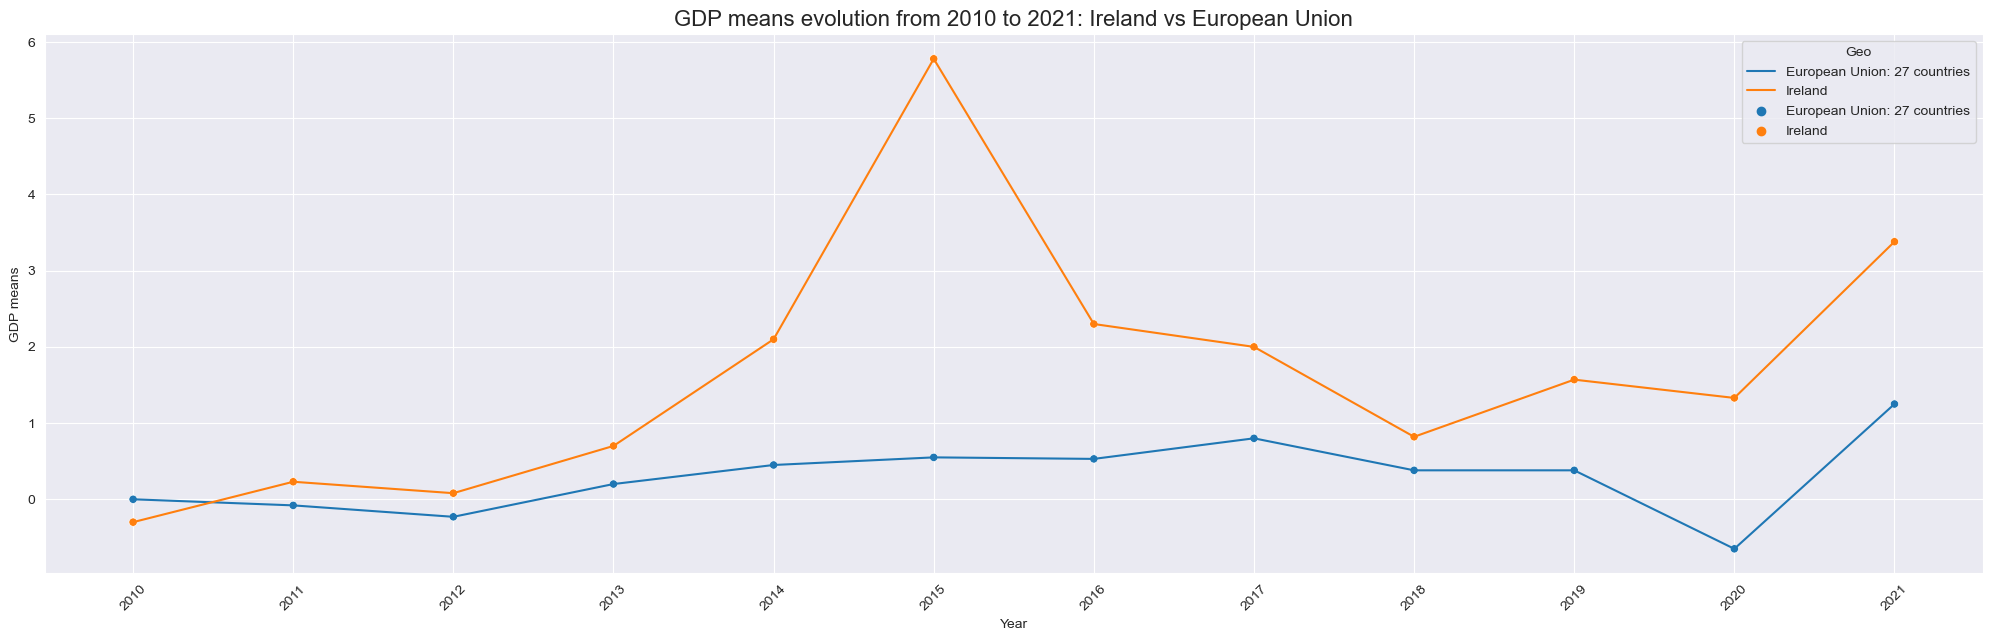

In [50]:
df_tmp = df_gdp_t[(df_gdp_t['Geo']=='Ireland') | (df_gdp_t['Geo']=='European Union: 27 countries')]

plt.figure(figsize=(25,7))
sns.lineplot(x=df_tmp["Year"],y=df_tmp['GDP means'],hue= df_tmp['Geo'])
sns.scatterplot(x=df_tmp["Year"],y=df_tmp['GDP means'],hue=df_tmp['Geo'])
plt.xticks(rotation=45);
plt.title("GDP means evolution from 2010 to 2021: Ireland vs European Union",fontsize=16);
plt.show()


### Generate a sentimental feature

GDP is an economic parameter essential in the index of producer prices of agricultural products (output) and the index of purchase prices of agricultural production (input) for Ireland and all the countries of the EU.

A Sentimental feature will be created according this creteria:

1- GDP between 0% to 3.5%could be considered **"positive"**

2- GDP out of this range, could be considered **"negative"**




In [51]:
# create a new DF

df_gdp_emo = df_gdp.copy()
df_gdp_emo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 10 to 37
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Geo     28 non-null     object 
 1   2010    28 non-null     float64
 2   2011    28 non-null     float64
 3   2012    28 non-null     float64
 4   2013    28 non-null     float64
 5   2014    28 non-null     float64
 6   2015    28 non-null     float64
 7   2016    28 non-null     float64
 8   2017    28 non-null     float64
 9   2018    28 non-null     float64
 10  2019    28 non-null     float64
 11  2020    28 non-null     float64
 12  2021    28 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.0+ KB


In [52]:
# Period under analysis: from 2010 to 2021
years = ('2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021')

for y in years:
#    i='emo'+y
     df_gdp_emo[y] = df_gdp[y].apply(lambda x: 'pos' if 0.0 > x <= 3.5 else 'neg')

df_gdp_emo


,Geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
10,European Union: 27 countries,neg,pos,pos,neg,neg,neg,neg,neg,neg,neg,pos,neg
11,Belgium,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,pos,neg
12,Bulgaria,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,pos,neg
13,Czechia,pos,pos,pos,neg,neg,neg,neg,neg,neg,neg,pos,neg
14,Denmark,pos,neg,pos,neg,neg,neg,neg,neg,neg,neg,pos,neg
15,Germany,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,pos,neg
16,Estonia,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
17,Ireland,pos,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
18,Greece,pos,pos,pos,pos,pos,neg,pos,neg,neg,neg,pos,neg
19,Spain,pos,pos,pos,pos,neg,neg,neg,neg,neg,neg,pos,neg


#### The index of purchase prices of the means of agricultural production (input)

In [53]:

df_ina

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,101.4,99.7,99.4,101.5,100.7,101.2,106.1,116.8,...,108.5,108.4,104.8,102.7,97.84,97.95,99.60,99.68,98.11,105.03
1,Belgium,100.0,100.2,99.1,97.7,96.2,97.6,103.1,111.7,122.3,...,111.1,110.2,101.7,99.3,97.09,98.35,99.59,100.08,98.22,107.70
2,Bulgaria,100.0,100.0,100.0,100.0,100.0,100.0,95.9,98.7,100.6,...,110.5,109.0,106.0,103.4,97.99,98.35,99.63,98.96,94.95,102.20
3,Czechia,100.0,100.1,97.4,96.0,99.8,97.7,98.6,101.1,104.1,...,106.4,108.1,106.0,103.0,96.23,95.05,94.96,95.18,92.46,94.35
4,Denmark,100.0,103.5,102.2,99.0,101.2,101.0,100.6,107.0,121.1,...,108.9,112.4,111.6,109.5,100.22,99.86,101.33,101.72,100.83,105.18
5,Germany,100.0,102.1,100.3,99.5,101.3,99.8,102.2,107.6,118.3,...,110.8,111.1,106.5,104.9,97.91,97.94,99.81,100.09,99.72,104.21
6,Estonia,100.0,100.0,100.0,100.0,100.0,100.0,101.5,103.6,103.4,...,100.0,100.0,100.0,100.0,97.06,94.44,94.17,93.78,93.11,95.73
7,Ireland,100.0,100.4,97.5,96.0,97.1,98.9,100.5,103.8,115.4,...,111.1,113.4,108.8,106.6,98.53,98.50,101.71,103.00,101.40,107.08
8,Greece,100.0,98.4,97.4,97.9,102.2,103.8,100.5,103.9,110.6,...,107.0,107.3,106.0,104.8,98.10,99.43,100.84,100.36,98.76,105.40
9,Spain,100.0,100.0,97.4,95.7,96.5,95.1,99.7,104.4,115.3,...,110.3,108.7,105.3,105.0,97.06,95.54,97.25,97.57,95.59,104.76


#### The index of producer prices of agricultural products (output)

In [54]:
df_outa

,Geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union: 27 countries,100.0,102.7,97.1,98.2,96.1,92.0,102.7,110.4,112.0,...,111.0,112.3,104.4,102.1,98.46,103.97,102.97,103.43,102.46,108.96
1,Belgium,100.0,102.0,91.0,92.5,92.7,91.4,111.2,109.2,103.6,...,108.3,111.7,92.6,88.0,101.66,104.84,110.28,108.05,103.92,111.13
2,Bulgaria,100.0,108.0,90.2,90.1,94.3,76.6,100.7,117.5,117.3,...,135.1,110.8,107.9,113.5,96.07,94.94,93.53,92.68,99.24,115.99
3,Czechia,100.0,106.1,94.4,91.0,94.7,87.2,98.6,108.8,110.7,...,119.1,122.9,117.7,110.3,93.55,98.16,96.29,98.61,92.28,95.48
4,Denmark,100.0,105.0,92.4,86.5,88.0,85.2,102.1,104.2,112.0,...,117.2,121.4,107.4,100.9,94.66,102.87,96.52,102.94,103.62,104.30
5,Germany,100.0,105.2,96.9,97.1,93.9,91.3,105.4,115.2,116.3,...,114.0,113.5,103.6,99.6,98.31,106.37,104.81,105.78,101.89,107.60
6,Estonia,100.0,100.0,100.0,100.0,117.4,118.0,98.1,107.2,101.3,...,100.0,100.0,100.0,100.0,96.60,106.56,105.24,104.47,101.62,113.17
7,Ireland,100.0,100.4,91.8,87.9,87.9,86.4,101.1,106.5,111.4,...,117.5,126.9,116.2,111.6,95.31,106.32,103.49,101.45,102.71,111.90
8,Greece,100.0,102.4,105.5,110.9,105.6,105.2,104.1,111.7,103.6,...,97.5,100.0,99.6,105.5,98.04,98.58,97.77,97.72,97.83,107.58
9,Spain,100.0,100.2,94.2,96.3,94.4,94.2,94.9,97.5,96.6,...,105.9,107.5,99.7,106.7,96.65,101.75,99.44,94.57,95.08,100.60


# Artificial Neural Network


## ANN Neural Networks

In this part, it implemented a simple ANN model for regression applying **3 Dimensional data** for:

- Country
- Year
- Features available: 

    - GDP means (means of GDP)
    - feature "emo" (including emotional features from the opinion of experts)
    - Expenditure_Index (Index of variation of the expenditure incurred by farmers(input))
    - Price_Index (feature target: index of producer prices of agricultural products (output))


Specifically, this is a problem for **multivariable (features)** time series forecasting that can be approached using ANN models for 
 
- input shape is 3 features, 28 countries (27 + EU global)
- activation function:  rectified linear unit  ReLU
- fully connected by using 32 nodes hidden layers

For regression:
    One unit with no activation function.
    
Loss function 
    for regression: Mean square error.



Ref: 

A. Géron, “Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow”  (p.  289-311)   2019. ,O'Reilly

J. Brownlee, 2020, Deep Learning for Time Series Forecasting, Edition: v1.7, Pag.123-149.

https://books.google.ie/books?hl=en&lr=&id=o5qnDwAAQBAJ&oi=fnd&pg=PP1&dq=J.+Brownlee,+2020,+Deep+Learning+for+Time+Series+Forecasting&ots=yH63pOsg07&sig=tbBnZAy1Q0G6QiLZG5TKfkkHNW8&redir_esc=y#v=onepage&q&f=false

https://en.wikipedia.org/wiki/Long_short-term_memory




In [55]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
#gpu = len(tf.config.list_physical_devices('GPU'))>0
#print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.8.15 (default, Nov 24 2022, 09:04:07) 
[Clang 14.0.6 ]
Pandas 1.5.2
Scikit-Learn 1.1.3


In [56]:

# Load libraries NN

from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor



## Data preparation 

### Melt all df's: df_gdp, df_gdp_emo, df_ina, df_outa

#### Period under study: 2010 to 2021



In [57]:
df_gdp_t

,Geo,Year,GDP means
0,European Union: 27 countries,2010,0.00
1,Belgium,2010,0.22
2,Bulgaria,2010,0.40
3,Czechia,2010,-0.12
4,Denmark,2010,-0.05
...,...,...,...
331,Romania,2021,1.12
332,Slovenia,2021,2.60
333,Slovakia,2021,0.28
334,Finland,2021,0.75


In [58]:
# Dataframe with data of Expenditure index

# melt df_ina for the period under study

# calling function melt_pivot

df_ina[['Geo', '2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021']]

df_ina_t = melt_pivot(df_ina[['Geo', '2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021']],   
        'Expenditure_Index')
df_ina_t


,Geo,Year,Expenditure_Index
0,European Union: 27 countries,2010,107.70
1,Belgium,2010,104.80
2,Bulgaria,2010,97.90
3,Czechia,2010,93.80
4,Denmark,2010,108.70
...,...,...,...
331,Romania,2021,107.23
332,Slovenia,2021,106.88
333,Slovakia,2021,95.70
334,Finland,2021,105.16


In [59]:
# Dataframe with data of Price index

# melt df_outa for the period under study

# calling function melt_pivot

df_outa[['Geo', '2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021']]

df_outa_t = melt_pivot(df_outa[['Geo', '2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021']],   
        'Price_Index')
df_outa_t

,Geo,Year,Price_Index
0,European Union: 27 countries,2010,104.10
1,Belgium,2010,97.50
2,Bulgaria,2010,98.10
3,Czechia,2010,88.70
4,Denmark,2010,100.50
...,...,...,...
331,Romania,2021,123.11
332,Slovenia,2021,109.37
333,Slovakia,2021,104.06
334,Finland,2021,101.74


In [60]:
# Dataframe with data of emotional feature about GDP

# it needs to convert the values 'pos' and 'neg' into an integer in order to prepare the data for the neural network algorithm

# Period under analysis: from 2010 to 2021
years = ('2010', '2011', '2012',  '2013', '2014', '2015', '2016', '2017', '2018',  '2019',  '2020', '2021')

for y in years:
#    i='emo'+y
     df_gdp_emo[y] = df_gdp_emo[y].apply(lambda x: 1 if x=='pos' else -1)

df_gdp_emo

# lambda x: 1 if x>0 else 0 if x ==0 else -1

,Geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
10,European Union: 27 countries,-1,1,1,-1,-1,-1,-1,-1,-1,-1,1,-1
11,Belgium,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
12,Bulgaria,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
13,Czechia,1,1,1,-1,-1,-1,-1,-1,-1,-1,1,-1
14,Denmark,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1
15,Germany,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
16,Estonia,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
17,Ireland,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
18,Greece,1,1,1,1,1,-1,1,-1,-1,-1,1,-1
19,Spain,1,1,1,1,-1,-1,-1,-1,-1,-1,1,-1


In [61]:
# melt df with emotional feature

# calling function melt_pivot

df_gdp_emo_t = melt_pivot(df_gdp_emo, 'emo')

df_gdp_emo_t.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Geo     336 non-null    object 
 1   Year    336 non-null    object 
 2   emo     336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


### Join data: df_gdp, df_gdp_emo, df_ina, df_outa just in one df and then, melt in order to show like time series format

In [62]:
from functools import reduce

# Merge the DF's Using Inner Join

df_final = reduce(lambda left, right:     # Merge three DF
                     pd.merge(left , right,
                              on = ['Geo','Year'],
                              how = 'outer'),                                        
                     [df_gdp_t,
                      df_gdp_emo_t,
                      df_ina_t, 
                      df_outa_t])
df_final



,Geo,Year,GDP means,emo,Expenditure_Index,Price_Index
0,European Union: 27 countries,2010,0.00,-1.0,107.70,104.10
1,Belgium,2010,0.22,-1.0,104.80,97.50
2,Bulgaria,2010,0.40,-1.0,97.90,98.10
3,Czechia,2010,-0.12,1.0,93.80,88.70
4,Denmark,2010,-0.05,1.0,108.70,100.50
...,...,...,...,...,...,...
331,Romania,2021,1.12,-1.0,107.23,123.11
332,Slovenia,2021,2.60,-1.0,106.88,109.37
333,Slovakia,2021,0.28,-1.0,95.70,104.06
334,Finland,2021,0.75,-1.0,105.16,101.74


In [63]:
df_final['Year'] = df_final['Year'].astype(int)
df_final['emo'] = df_final['emo'].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo                336 non-null    object 
 1   Year               336 non-null    int64  
 2   GDP means          336 non-null    float64
 3   emo                336 non-null    int64  
 4   Expenditure_Index  336 non-null    float64
 5   Price_Index        336 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.4+ KB



# Artificial Neural Network


## Neural network

#### Prepare the data array 3D for Neural Network algorithm

In [64]:
df_final

,Geo,Year,GDP means,emo,Expenditure_Index,Price_Index
0,European Union: 27 countries,2010,0.00,-1,107.70,104.10
1,Belgium,2010,0.22,-1,104.80,97.50
2,Bulgaria,2010,0.40,-1,97.90,98.10
3,Czechia,2010,-0.12,1,93.80,88.70
4,Denmark,2010,-0.05,1,108.70,100.50
...,...,...,...,...,...,...
331,Romania,2021,1.12,-1,107.23,123.11
332,Slovenia,2021,2.60,-1,106.88,109.37
333,Slovakia,2021,0.28,-1,95.70,104.06
334,Finland,2021,0.75,-1,105.16,101.74


### Transform categorical data into integer

In [65]:

# LabelEncoder can be used to transform categorical data into integers:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['Geo'] = label_encoder.fit_transform(df_final['Geo'])


## Select features and target for all models below

In [66]:
features = df_final[['Geo','Year','GDP means','emo','Expenditure_Index']]
target = df_final['Price_Index']

### Standardizer the data of features and reshape df in format array 3D for ANN model

In [67]:
#standardizing the training dataset before training.
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
features_scaled = scaler.fit_transform(features)

# creating back a Dataframe object
features_scaled = pd.DataFrame(features_scaled)

### reshape DF in format array 3 D

In [68]:
features_scaled3D = features_scaled.to_numpy().reshape(12, 28, 5)

In [69]:
target3D = target.to_numpy().reshape(12, 28, 1)

In [70]:
print(features_scaled3D.shape)
print(target3D.shape)

(12, 28, 5)
(12, 28, 1)


In [71]:

# Divide the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
features_scaled3D, target3D, test_size=0.20, random_state=61)

print('features and target: ', features_scaled3D.shape, target3D.shape)
print('data for train: ', x_train.shape, y_train.shape)
print('data for test: ', x_test.shape, y_test.shape)


features and target:  (12, 28, 5) (12, 28, 1)
data for train:  (9, 28, 5) (9, 28, 1)
data for test:  (3, 28, 5) (3, 28, 1)


In [72]:
#input_shape=train_dataset.shape[1:])
x_train.shape[1:]

(28, 5)

In [73]:

# Define neural network model
network = models.Sequential()

#  https://keras.io/api/layers/core_layers/
# -------------- ReLU ------
# Regression:
# One unit with no activation function.
# --------------------------

# ------- loss function -------
# Regression: Mean square error.
# -----------------------------


# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32,  # 32 
                         activation="relu",
                         input_shape=(28,5))) # flatten features


# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))


# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))  # Regression: One unit with no activation function.


# Compile neural network
network.compile(loss="mse", # Mean squared error for regression
                optimizer="Adam", # Adam is an update to the RMSProp optimizer
                #optimizer="RMSprop", # Optimization algorithm
                metrics=["mse"]) # Mean squared error

print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 32)            192       
                                                                 
 dense_1 (Dense)             (None, 28, 32)            1056      
                                                                 
 dense_2 (Dense)             (None, 28, 1)             33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
None


2022-12-28 19:58:44.071370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [74]:
# Training neural network
history = network.fit(x_train, # Features
                      y_train, # Target vector
                      epochs=10, # Number of epochs 10
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch (100)
                      validation_data=(x_test, y_test)) # Test data

# Usually Batch Size <= Size of Training Set


In [75]:
print(y_train.shape)
print(y_test.shape)

(9, 28, 1)
(3, 28, 1)


## Making prediction

In [76]:
# Predict classes of test set
predicted_target = network.predict(x_test)

#print('\n Data for target test:', y_test)
#print('\n Data predicted for the feature test:', predicted_target)

print('\n Number of values for target test: ', y_test.shape[1])
print('\n Dimension for target test: ',  y_test.shape)
print('\n Dimension of values for predicted values: ',  predicted_target.shape)

pd.DataFrame(tf.keras.metrics.mean_squared_error(y_test, predicted_target)).describe() 

1/1 [==============================] - 0s 87ms/step

 Number of values for target test:  28

 Dimension for target test:  (3, 28, 1)

 Dimension of values for predicted values:  (3, 28, 1)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,10903.416992,10022.377930,11428.508789,12265.496094,10986.687500,11233.156250,10187.985352,12296.961914,9673.565430,9680.827148,...,9544.579102,10252.761719,10114.791992,12320.520508,9720.171875,11162.614258,11210.799805,10772.129883,10887.352539,11512.432617
std,430.437561,1832.132080,2737.365479,2715.556152,1569.137451,774.235962,632.641663,1436.975220,153.734070,295.716919,...,454.487885,164.728485,486.247192,1238.968506,896.187683,583.771423,623.715210,1710.243652,1042.859253,1573.600342
min,10525.062500,8450.247070,8645.015625,9131.551758,9243.813477,10665.158203,9793.700195,10661.753906,9505.827148,9341.546875,...,9205.238281,10077.614258,9788.278320,10890.898438,9133.490234,10750.283203,10513.877930,9480.278320,10099.370117,10381.793945
25%,10669.263184,9016.358398,10084.120117,11437.181641,10336.500000,10792.209961,9823.125488,11766.229980,9606.469727,9579.311523,...,9286.398438,10176.850098,9835.377441,11939.777832,9204.378906,10828.622559,10957.914062,9802.392090,10296.064941,10613.845703
50%,10813.463867,9582.469727,11523.224609,13742.811523,11429.186523,10919.261719,9852.550781,12870.706055,9707.112305,9817.076172,...,9367.558594,10276.085938,9882.476562,12988.657227,9275.267578,10906.961914,11401.950195,10124.505859,10492.759766,10845.897461
75%,11092.592773,10808.443359,12820.256348,13832.468750,11858.123535,11517.154297,10385.128906,13114.566406,9757.433594,9850.467773,...,9714.250000,10340.335449,10278.049316,13035.331543,10013.512695,11368.780273,11559.259766,11418.056152,11281.345215,12077.750488
max,11371.721680,12034.416992,14117.288086,13922.125977,12287.060547,12115.046875,10917.707031,13358.426758,9807.754883,9883.859375,...,10060.941406,10404.584961,10673.622070,13082.005859,10751.757812,11830.598633,11716.569336,12711.606445,12069.930664,13309.603516


### Evaluate model using MSE

### Accuracy using mean squared error (MSE) 
### MSE, measures the average of the squares of the errors— 
### that is, the average squared difference between the estimated values and the actual value.

In [77]:
scores = network.evaluate(x_train, y_train)
print("Score MSE for data training: %.2f%%\n" % (scores[1]))

scores = network.evaluate(x_test, y_test)
print("Score MSE for data test: %.2f%%\n" % (scores[1]))

1/1 [==============================] - 0s 20ms/step - loss: 10900.1670 - mse: 10900.1670
Score MSE for data training: 10900.17%

1/1 [==============================] - 0s 18ms/step - loss: 10905.0479 - mse: 10905.0479
Score MSE for data test: 10905.05%



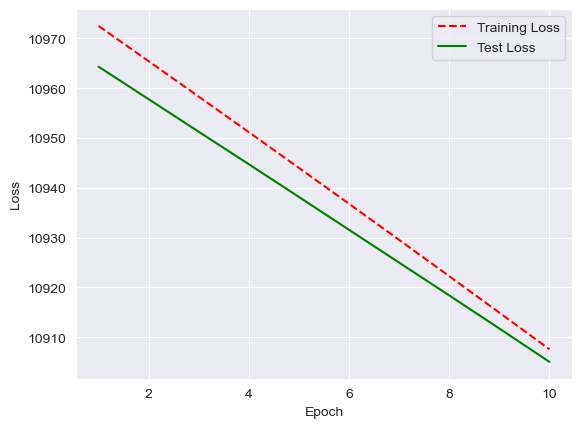

In [78]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Visualize loss history
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "g-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();


## k-Fold Cross-Validating Neural Networks

Ref:

A. Géron, “Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow” (p.322) 2019. ,O'Reilly


In [79]:
# k-Fold Cross-Validating Neural Networks
# Load libraries

from keras.wrappers.scikit_learn import KerasRegressor  # using for k-folk CV
from sklearn.model_selection import KFold               # using for k-folk CV

# Create function for Neural Network Model
def network_kfold():

    # Define neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation="relu", 
                             input_shape=(28,5)))  # 5 features, 28 countries

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=32, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    #rmsprop = optimizers.RMSprop(lr=0.001)
    network.compile(loss="binary_crossentropy", # Cross-entropy
                    #optimizer="rmsprop", # Root Mean Square Propagation
                    optimizer="Adam", # Adam is an update to the RMSProp optimizer
                    metrics=["accuracy"]) # Accuracy performance metric

    # Return compiled network
    return network


## Define a dictionary for accumulating the results from k-fold over all models in order to compare them
**scores_models**

In [80]:
scores_models = {}

In [81]:

# Wrap Keras model so it can be used by scikit-learn
kfold = KFold(n_splits = 10)

neural_network = KerasRegressor(build_fn=network_kfold,
                                 epochs=10,
                                 batch_size=10,  #
                                 verbose=0)

# Evaluate neural network using 10 ten-fold cross-validation
results= cross_val_score(neural_network, features_scaled3D, target3D, cv=kfold)

scores_models['KerasRegressor'] = results


In [82]:

print("\n Results MSE: %.2f (%.2f) " % (results.mean(), results.std()))




 Results MSE: 78.05 (46.08) 


# Use ensemble method to improve performance and accuracy<a name="esn"></a>

### - Random Forest for regression
### - Light GBM or light gradient-boosting machine for regression
### - XGBoost or eXtreme Gradient Boosting for regression


All these modelos below caming from the same concept of decisiom tree with diferene in order to optain performance and avoid overfitting. 


- Random Forests (RF is used extensively in the industry because provides good results for many problems)
https://scikit-learn.org/stable/modules/ensemble.html?highlight=random+forest#forests-of-randomized-trees

The faster development of algorithms based on the technique of **gradient boosting** framework has two principal options very popular in the Kaggle competition:

- Light GBM or light gradient-boosting machine development by Microsoft.
https://lightgbm.readthedocs.io/en/v3.3.2/


- XGBoost or eXtreme Gradient Boosting from the Distributed (Deep) Machine Learning Community (DMLC) group.
https://xgboost.readthedocs.io/en/stable/

This project will be implemented both algorithms applied for a regression problem.

In theory, Light GBM would be better from the point of view of faster training speed and higher efficiency. 


https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/



In [83]:
#importing standard libraries 
import numpy as np 
import pandas as pd 
from numpy import mean
from numpy import std
from pandas import Series, DataFrame 

#import lightgbm and xgboost 
from lightgbm import LGBMRegressor
import lightgbm as lgb 
import xgboost as xgb 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# plot tree 

import graphviz

In [84]:
print(xgb.__version__)
print(lgb.__version__)

1.5.0
3.2.1


## Prepare the data: features and target for all models

In [85]:
print('target: ', target.shape)
print('features: ')
features

target:  (336,)
features: 


,Geo,Year,GDP means,emo,Expenditure_Index
0,8,2010,0.00,-1,107.70
1,1,2010,0.22,-1,104.80
2,2,2010,0.40,-1,97.90
3,5,2010,-0.12,1,93.80
4,6,2010,-0.05,1,108.70
...,...,...,...,...,...
331,23,2021,1.12,-1,107.23
332,25,2021,2.60,-1,106.88
333,24,2021,0.28,-1,95.70
334,9,2021,0.75,-1,105.16


In [86]:
#standardizing the training dataset before training.
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
features_scaled = scaler.fit_transform(features)


In [87]:
# Divide the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
features_scaled, target, test_size=0.20, random_state=61)

print('features and target: ', features_scaled.shape, target.shape)
print('data for train: ', x_train.shape, y_train.shape)
print('data for test: ', x_test.shape, y_test.shape)



features and target:  (336, 5) (336,)
data for train:  (268, 5) (268,)
data for test:  (68, 5) (68,)


In [88]:
models = []

- Random Forests (RF is used extensively in the industry because provides good results for many problems)

- XGBoost (XGBoost is used extensively in Kaggle competitions)

- Lightgbm or light gradient-boosting ( also popular in Kaggle competition and in theory, faster)


In [89]:
models.append(('randomforest', RandomForestRegressor(n_estimators = 300, min_samples_split = 2, 
                                   min_samples_leaf= 1, max_features = 'sqrt', 
                                   max_depth= 10, bootstrap=True)))

models.append(('XGBoost', XGBRegressor(n_estimators=100, max_depth=4,reg_alpha=0.9)
              ))

models.append(('lgmboost', LGBMRegressor(n_estimators=100, max_depth=4, num_leaves=10)
              ))




In [90]:
results = []
name_model = []
for name, model in models:
    # Conduct k-fold cross-validation
    print ("\n Model:  ", name)
    kfold = KFold(n_splits=10, shuffle=True, random_state=61)
    kf_results = cross_val_score(model,
                             x_train,y_train,
                             cv=kfold,
                             scoring='neg_mean_squared_error', # MSE for regression
                             #scoring='r2', # 
                             n_jobs=-1) # use all cpu available 
    
    model.fit( x_train, y_train)
    print(' Score train data:  ', model.score(x_train, y_train))
    print(' Score test data:  ', model.score(x_test, y_test))
    
    scores_models[name] = kf_results

    results.append(kf_results)
    name_model.append(name)

    # end  

    


 Model:   randomforest
 Score train data:   0.8997658735004799
 Score test data:   0.34221930220237884

 Model:   XGBoost
 Score train data:   0.9877436193544469
 Score test data:   0.41745129345636967

 Model:   lgmboost
 Score train data:   0.7002110123634081
 Score test data:   0.29173875178425446



		 Model:     randomforest
 
	 Score train data:   0.8997658735004799
	 Score test data:   0.34221930220237884

 
	 Residual Analysis:    randomforest


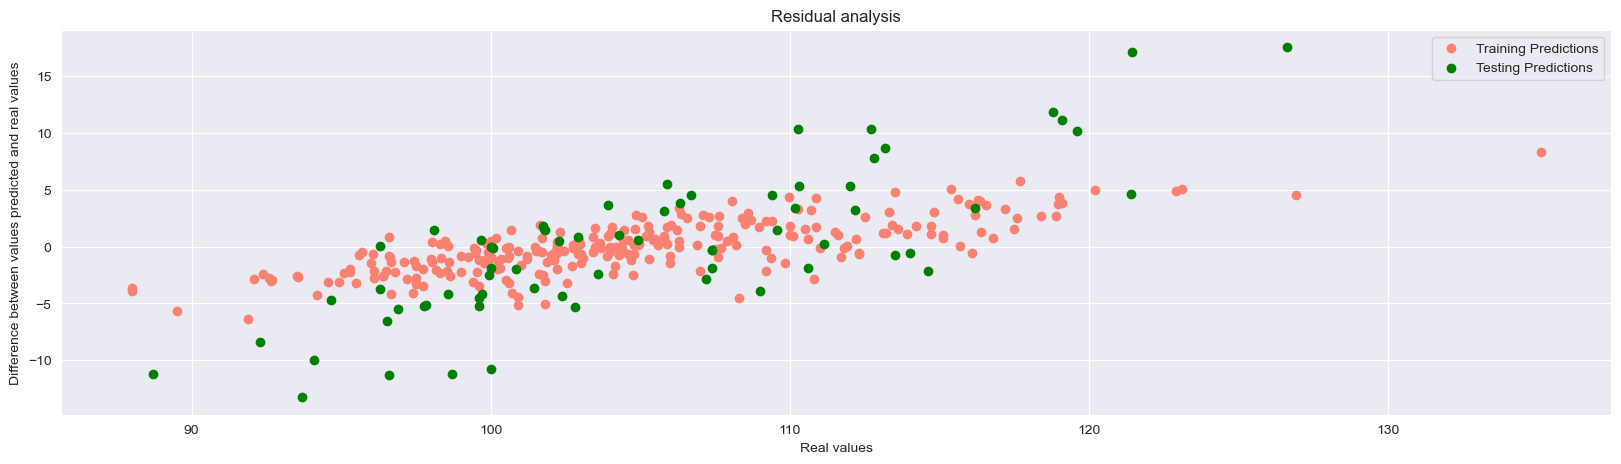


	  For Test Data:  
 
	 MAE:  4.842300153957812
	 MSE:  40.63664924617912
	 RMSE:  6.374688168544334




		 Model:     XGBoost
 
	 Score train data:   0.9877436193544469
	 Score test data:   0.41745129345636967

 
	 Residual Analysis:    XGBoost


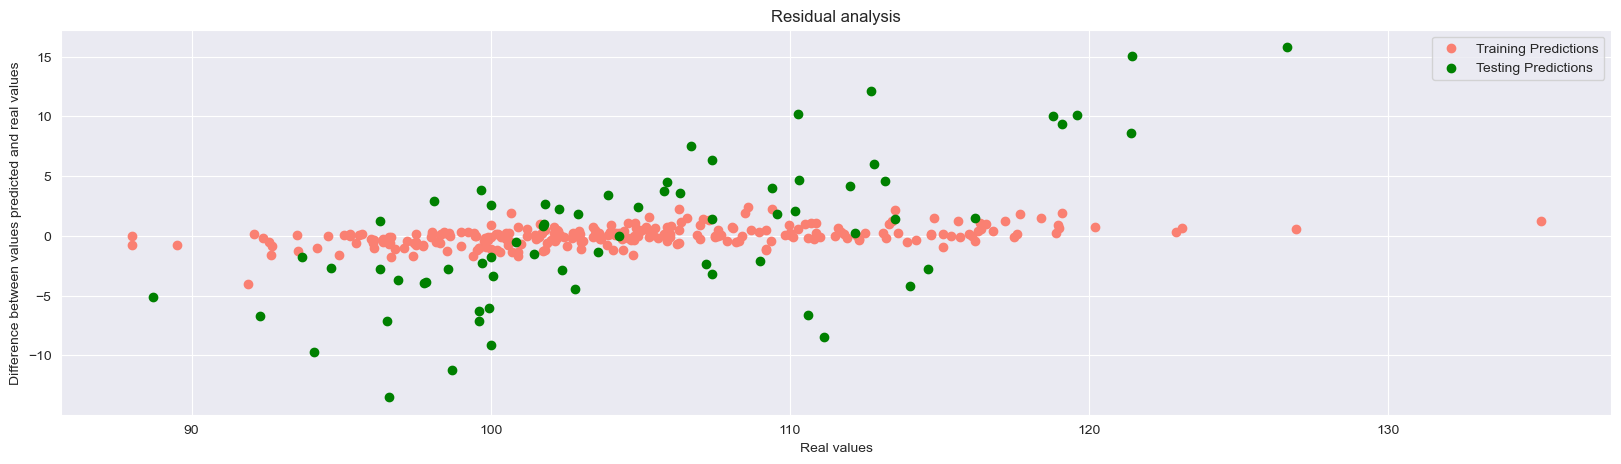


	  For Test Data:  
 
	 MAE:  4.781071014404297
	 MSE:  35.98893603276913
	 RMSE:  5.99907793187996




		 Model:     lgmboost
 
	 Score train data:   0.7002110123634081
	 Score test data:   0.29173875178425446

 
	 Residual Analysis:    lgmboost


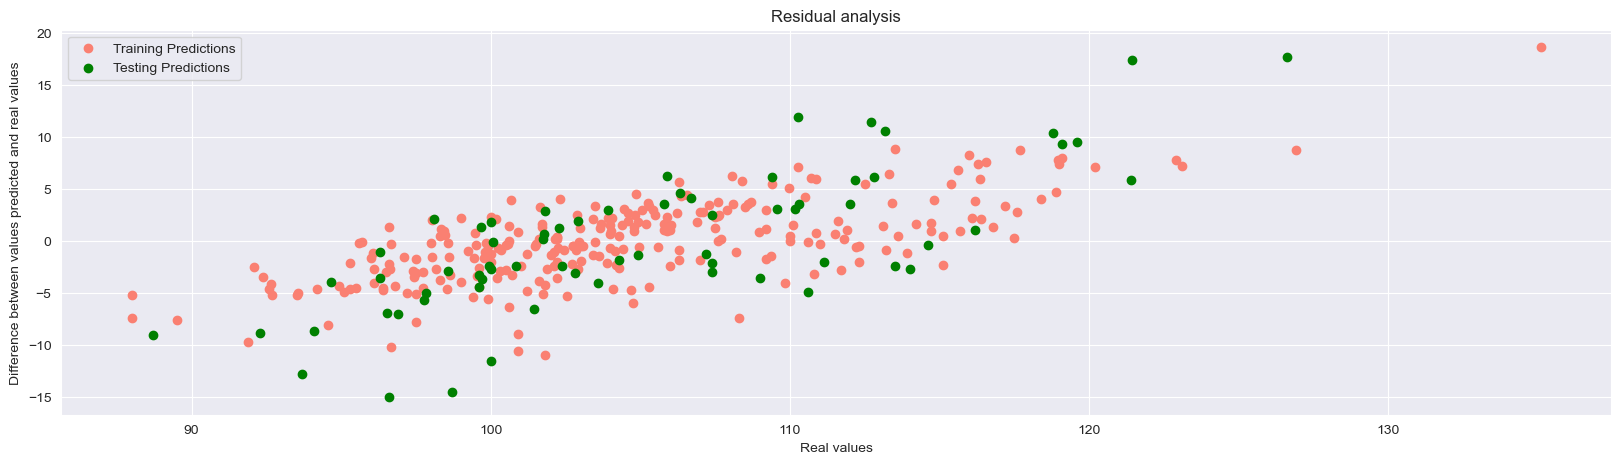


	  For Test Data:  
 
	 MAE:  5.142487199971555
	 MSE:  43.75525766379267
	 RMSE:  6.6147757077464595





In [91]:
for name, model in models:
    # Predicting the Test set results
    y_pred = model.predict(x_test)
    ytrain_pred = model.predict(x_train)
    print('\n\t\t Model:    ', name)
    print(' \n\t Score train data:  ', model.score(x_train, y_train))
    print('\t Score test data:  ', model.score(x_test, y_test))
   
    print("\n ")
    print("\t Residual Analysis:   ", name)
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-ytrain_pred),color = "salmon",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.xlabel('Real values')
    plt.ylabel('Difference between values predicted and real values')
    plt.title('Residual analysis')
    #plt.set_xlabel('')
    #plt.set_ylabel('')
    #plt.set_title('')
    
    plt.show()

    print("\n\t  For Test Data:  \n ")
    print("\t MAE: ",mean_absolute_error(y_test, y_pred))
    print("\t MSE: ",mean_squared_error(y_test, y_pred))
    print("\t RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n\n')
    # end

# Final comparison between the models


In [92]:
df_score_models = abs(pd.DataFrame(scores_models))
df_score_models

,KerasRegressor,randomforest,XGBoost,lgmboost
0,59.437836,44.810758,41.355402,44.683154
1,36.729637,21.777917,35.233136,23.976182
2,66.113525,48.357206,59.491680,50.073500
3,50.212196,19.690907,20.303456,20.242686
4,51.825176,30.908841,24.063735,29.290550
5,104.255547,42.834926,44.377609,37.937648
6,56.849129,15.784587,23.807834,17.896157
7,39.043507,22.829251,58.626959,32.274694
8,125.401527,29.560532,26.530033,32.726593
9,190.622314,36.685630,51.000052,37.795836


In [93]:
df_score_models.describe()

,KerasRegressor,randomforest,XGBoost,lgmboost
count,10.000000,10.000000,10.000000,10.000000
mean,78.049039,31.324056,38.478990,32.689700
std,48.569945,11.434082,14.734781,10.333781
min,36.729637,15.784587,20.303456,17.896157
25%,50.615441,22.040751,24.680310,25.304774
50%,58.143482,30.234687,38.294269,32.500643
75%,94.720041,41.297602,49.344442,37.902195
max,190.622314,48.357206,59.491680,50.073500


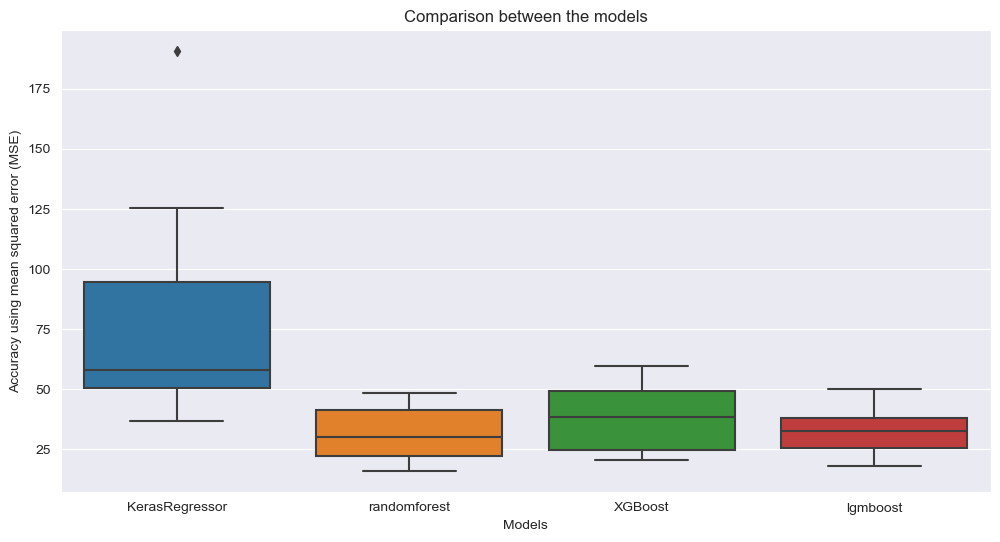

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_score_models)
#plt.legend()

plt.xlabel('Models')

plt.ylabel('Accuracy using mean squared error (MSE)')
plt.title('Comparison between the models')
plt.show()
    

## Statistical analysis: conclusion

#### Statistical analysis:

Despite the fact that the mse mean in the Random Forest model is less than the mean on the Light gradient-boosting, **31.44 vs 32.68**, the standard deviation is less in the Light gradient-boosting mean that the values of mse are most stable. Less dispersion, therefore, will be chosen the  **Light gradient-boosting** as the best model for this problem.



# Tune ensemble method: GridSearchCV (Light GBM or Light gradient-boosting)<a name="gs"></a>

GridSearchCV

Based on the Gridsearchcv technique from Sci kit-Learn package it is possible to tunning the Hyper parameter fro the model selected.

This facility allows us to find the best hyper parameter combination to obtain the best results.  

In [104]:
#LGBMRegressor(n_estimators=100, max_depth=4, num_leaves=31

model = LGBMRegressor()

kfold = KFold(n_splits=10, shuffle=True, random_state=61)


n_estimators = [50, 100, 150]
max_depth = [4, 6, 8]
num_leaves = [10, 20, 30]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, num_leaves=num_leaves)

In [105]:
#Model Selection 

grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring="neg_mean_squared_error",
                           #scoring="r2",
                           n_jobs=-1, 
                           cv=kfold,
                           verbose=1)


grid_result = grid_search.fit(x_train, y_train)


# summarize results
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))

grid_result


# ML Python_Data_Science_Handbook.pdf
# Pag 79
# pag 366 365

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
# https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

# It's simple: minimizing MSE is equivalent to maximizing negative-MSE.

# An objective function that the scorer can maximize is just by "convention" 
# as the Sklearn documentation suggests



Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best: 31.983541 using {'max_depth': 6, 'n_estimators': 50, 'num_leaves': 10}


GridSearchCV(cv=KFold(n_splits=10, random_state=61, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 100, 150],
                         'num_leaves': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [106]:
grid_result.cv_results_
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
#for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) using these parameters: %r" % ((-mean), stdev, param))

# chose the small value 


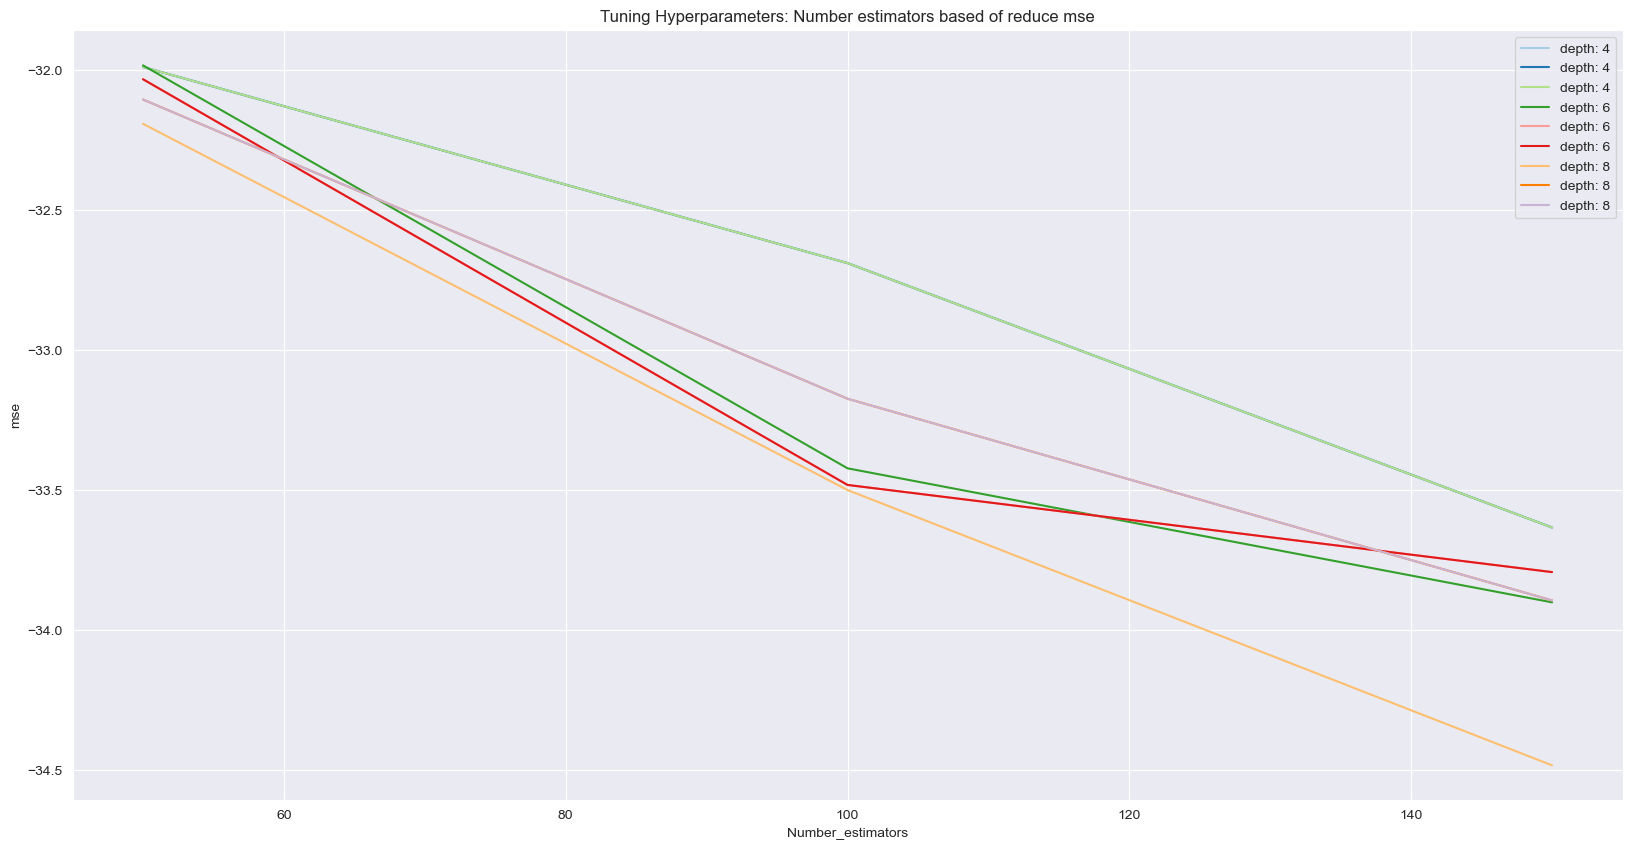

In [107]:
# plot results
plt.figure(figsize = (20,10))
scores = np.array(means).reshape(len(max_depth), len(n_estimators), len(num_leaves))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label= 'depth: ' + str(value))
plt.legend()
plt.xlabel( 'Number_estimators' )
plt.ylabel( 'mse' )
plt.title('Tuning Hyperparameters: Number estimators based of reduce mse')

plt.show()


# Final model: Light GBM or Light gradient-boosting<a name="xgb"></a>

Best hyperparameters to use: {'max_depth': 6, 'n_estimators': 50, 'num_leaves': 10}

In [108]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(268, 5) (68, 5)
(268,) (68,)


In [109]:
# apply XGBoost regressor with optimous hyper parameters
lgbm_model = LGBMRegressor(n_estimators=50, 
                           max_depth=6, 
                           num_leaves=10).fit(x_train, y_train)


In [110]:
y_pred=lgbm_model.predict(x_test)        # prediction for test data
y_train_pred=lgbm_model.predict(x_train) # prediction for train data

In [111]:
# metrics 
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred, squared=True))
print("R2_Score: ", r2_score(y_test, y_pred))



MAE:  5.251131692104555
MSE:  46.28589506646431
R2_Score:  0.2507756195506433


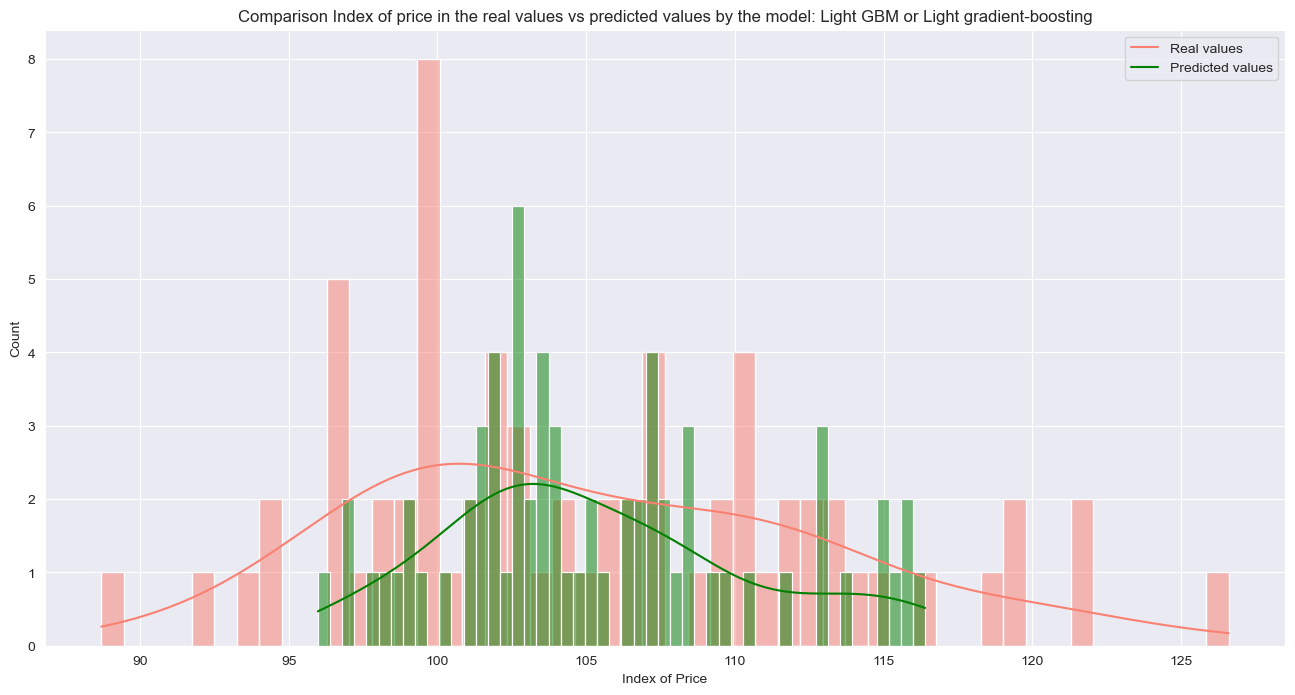

In [112]:
fig = plt.figure(figsize=(16, 8))
sns.set_palette("Paired")
sns.histplot(y_test, kde=True, color='salmon', bins=50)
sns.histplot((y_pred), kde=True, color='green', bins=50)
plt.legend(['Real values', 'Predicted values'])
plt.xlabel( 'Index of Price' )

plt.title('Comparison Index of price in the real values vs predicted values by the model: Light GBM or Light gradient-boosting')

plt.show()

